In [29]:
import os
import numpy as np
import pandas as pd
from pathlib import Path

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MiniBatchKMeans, AgglomerativeClustering, SpectralClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

import matplotlib.pyplot as plt

In [30]:
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

In [31]:
df = pd.read_csv('d:/ADP Training/adp_data_cap/phase1_usage_encoded.csv')
df.head()

EmployeeID  Age  Tenure  UsageFrequency LastUsedDate  \
0           1   62       8               5   2023-08-27   
1           1   62       8               3   2024-07-02   
2           1   62       8               5   2023-09-16   
3           1   62       8               0   2024-04-16   
4           1   62       8               0   2024-03-27   

                BenefitType               BenefitSubType  BenefitCost  \
0  Professional Development        Conference Attendance       850.00   
1           Retirement Plan  401k Catch-Up Contributions       509.65   
2          Health Insurance              HDHP Individual        84.55   
3      Cell Phone Allowance       Monthly Communications        65.00   
4            Gym Membership            Family Membership       519.66   

   Gender_Female  Gender_Male  ...  BenefitID_25  BenefitID_26  BenefitID_27  \
0          False         True  ...         False         False         False   
1          False         True  ...         False         False         False   
2          False         True  ...         False         False         False   
3          False         True  ...         False         False         False   
4          False         True  ...         False          True         False   

   BenefitID_28  BenefitID_29  BenefitID_30  UsageCategory  Usage__High  \
0         False         False         False         Medium        False   
1         False         False         False         Medium        False   
2         False         False         False         Medium        False   
3         False         False         False            Low        False   
4         False         False         False            Low        False   

   Usage__Low  Usage__Medium  
0       False           True  
1       False           True  
2       False           True  
3        True          False  
4        True          False  

[5 rows x 57 columns]

# Clustering

In [4]:

def mode_or_first(s: pd.Series):
    m = s.mode(dropna=True)
    return m.iloc[0] if not m.empty else (s.dropna().iloc[0] if s.notna().any() else np.nan)

# Create AgeGroup if missing and Age exists
if "AgeGroup" not in df.columns and "Age" in df.columns:
    bins = [0, 25, 41, 57, np.inf]
    labels = ["Gen Z (18–25)", "Millennial (26–41)", "Gen X (42–57)", "Boomer (58+)"]
    df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels, right=True, include_lowest=True)

# Build usage features (unchanged)
df["BenefitFull"] = df["BenefitType"].astype(str) + " - " + df["BenefitSubType"].astype(str)
features = (
    df.pivot_table(index="EmployeeID",
                   columns="BenefitFull",
                   values="UsageFrequency",
                   aggfunc="sum",
                   fill_value=0)
    .reset_index()
)

# Safe meta aggregation by EmployeeID (only use columns that exist)
candidate_meta = ["AgeGroup", "Gender", "Department"]
meta_cols = [c for c in candidate_meta if c in df.columns]
if meta_cols:
    meta = (
        df.groupby("EmployeeID", as_index=False)[meta_cols]
          .agg({c: mode_or_first for c in meta_cols})
    )
    features = features.merge(meta, on="EmployeeID", how="left")

# Numeric matrix X
drop_cols = ["EmployeeID"] + meta_cols
X = features.drop(columns=[c for c in drop_cols if c in features.columns], errors="ignore")

# Scale + PCA2D
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca2d = PCA(n_components=2, random_state=42)
X_2d = pca2d.fit_transform(X_scaled)






## STEP 3. CLUSTERING FUNCTION


=== Global Clustering on All Employees ===


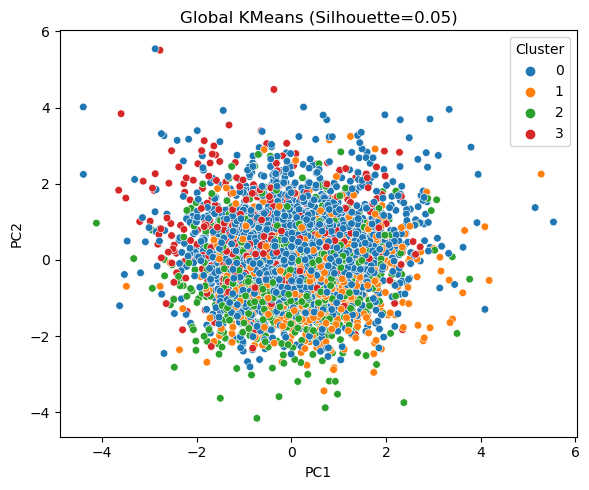

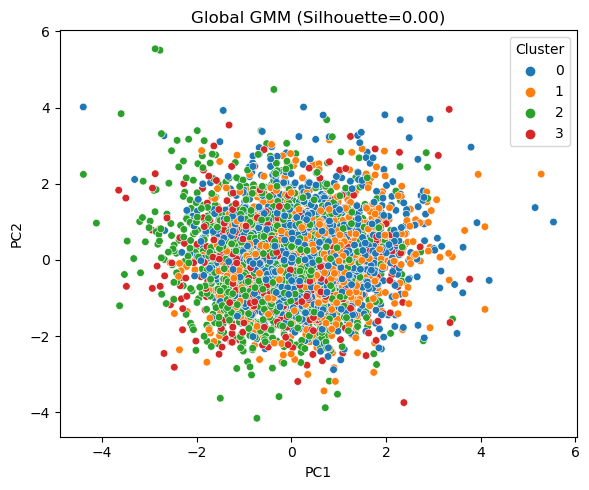

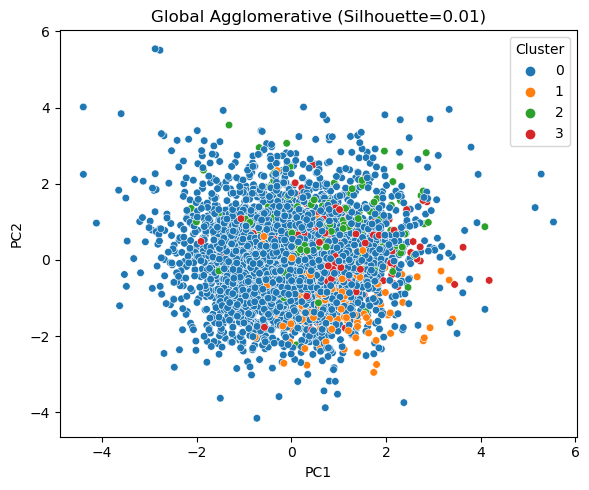

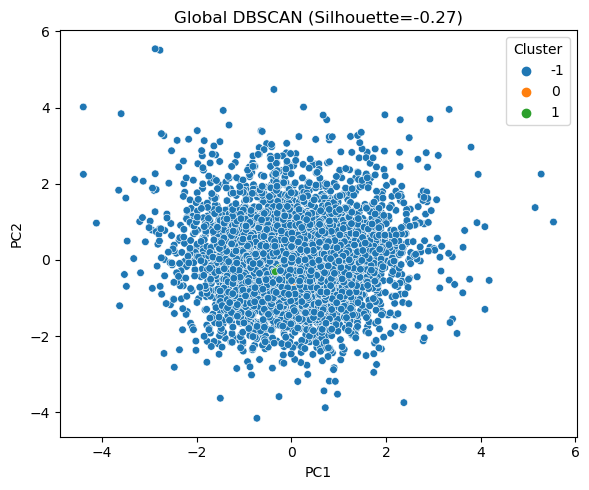

Subgroup columns found: ['AgeGroup']

=== Clustering for AgeGroup = Boomer (58+) (n=928) ===


d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


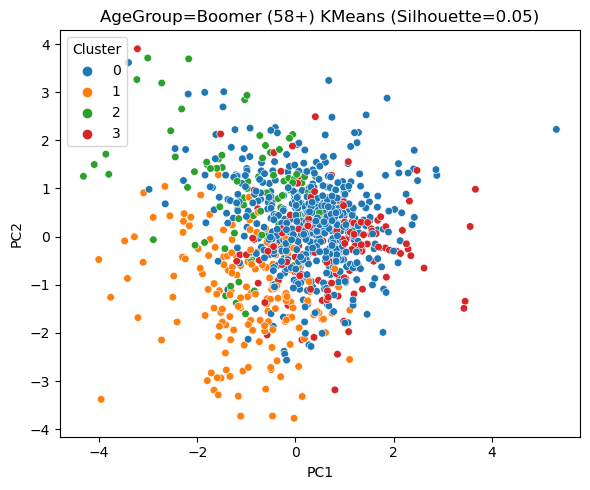

d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


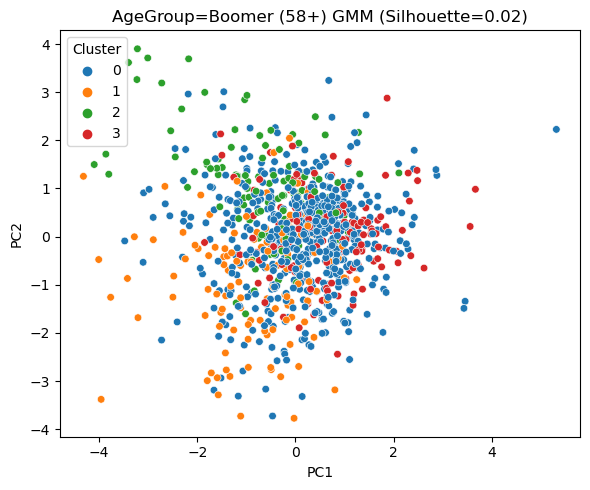

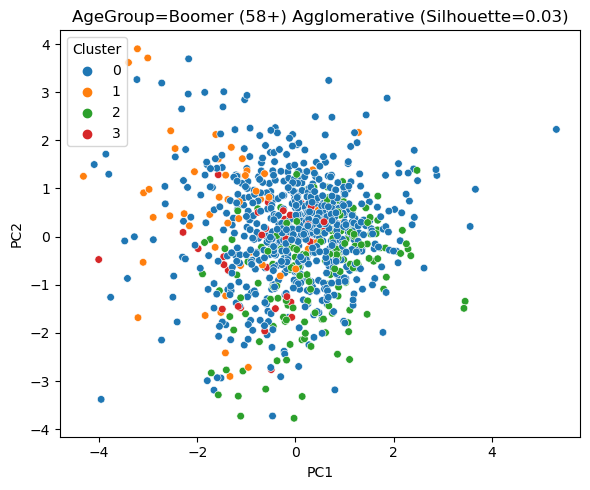

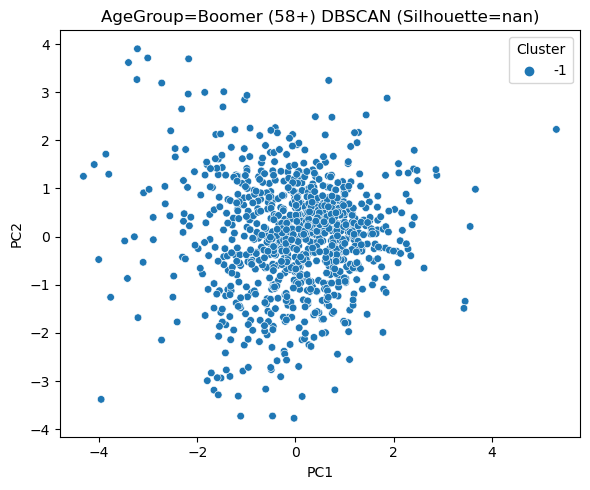


=== Clustering for AgeGroup = Millennial (26–41) (n=1790) ===


d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


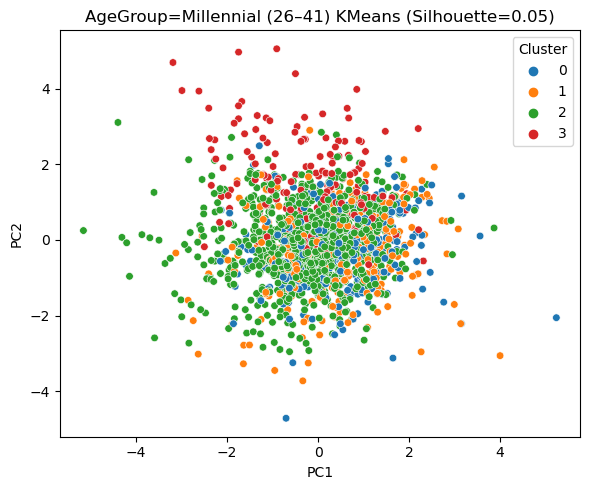

d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


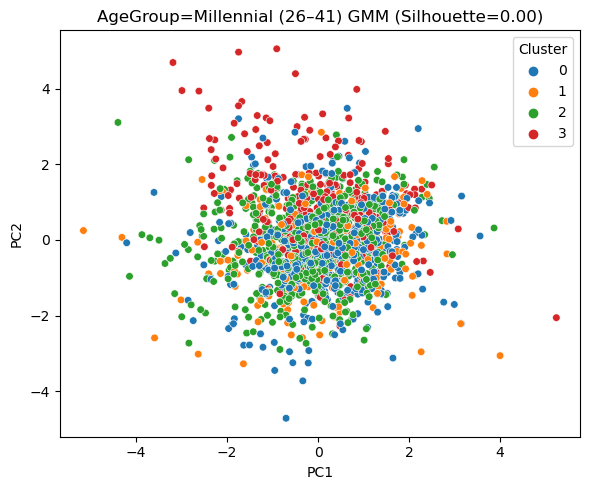

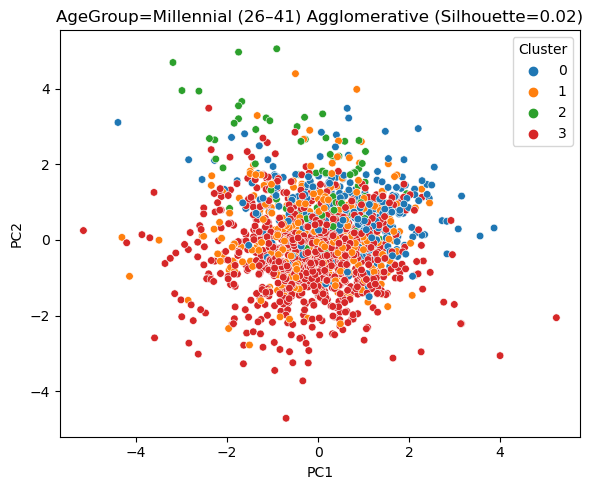

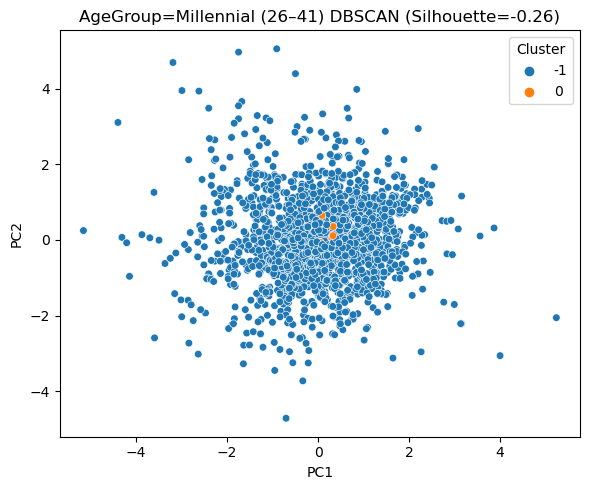


=== Clustering for AgeGroup = Gen X (42–57) (n=1802) ===


d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


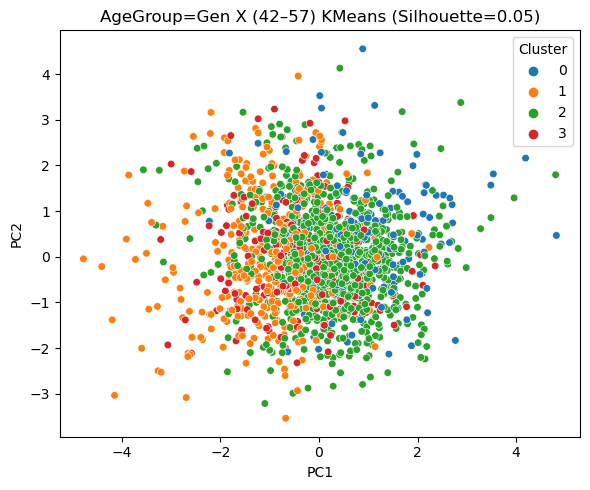

d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


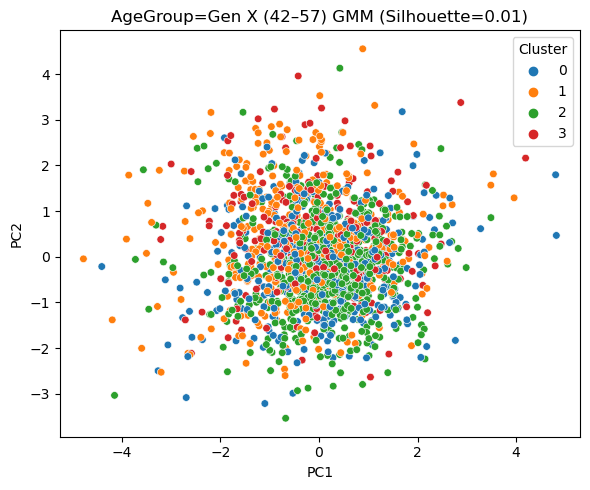

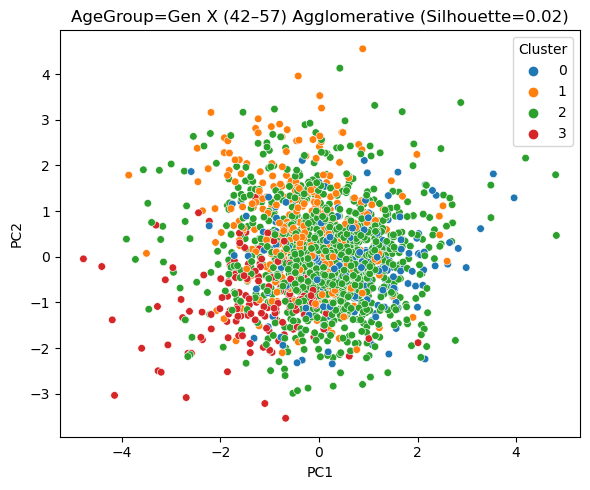

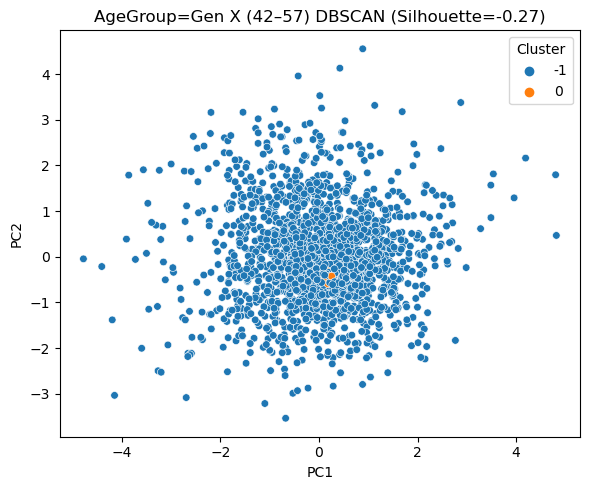


=== Clustering for AgeGroup = Gen Z (18–25) (n=480) ===


d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


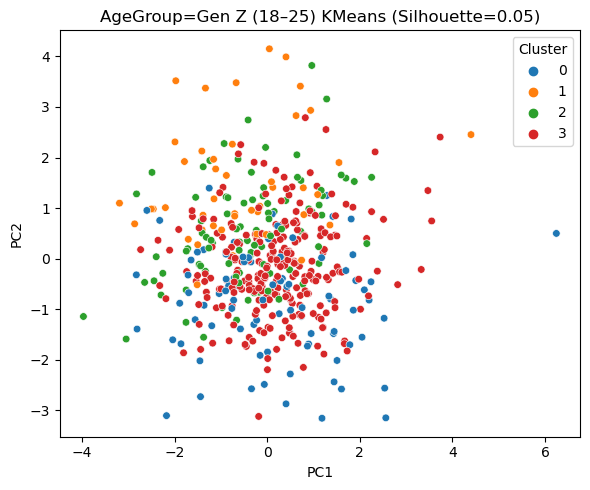

d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


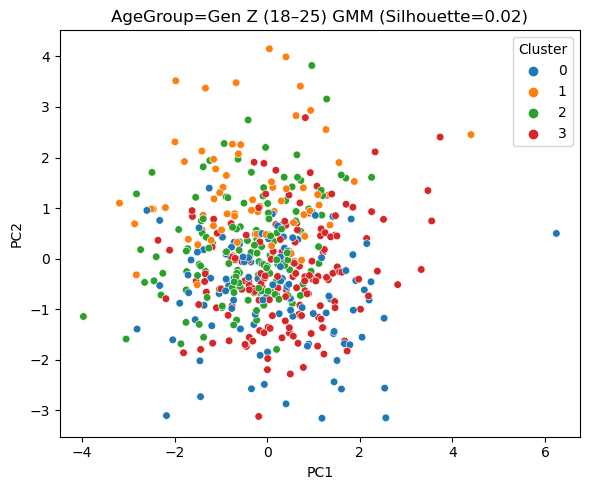

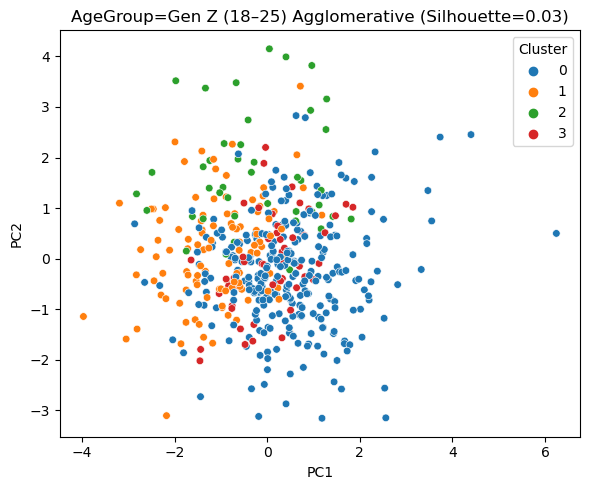

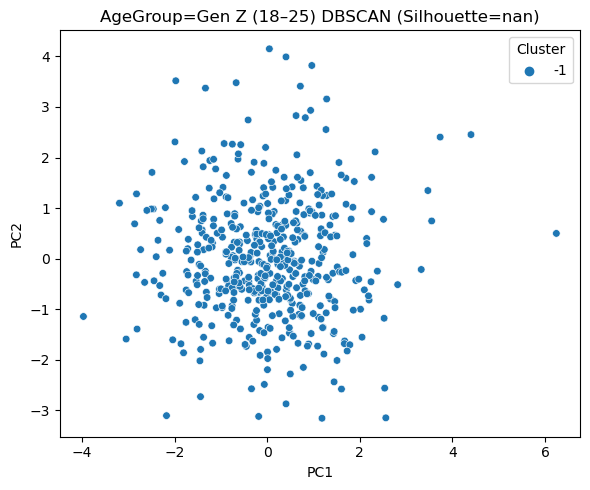

In [7]:

def run_clustering(X_scaled, X_2d, title_prefix="", n_clusters=4):
    models = {
        "KMeans": KMeans(n_clusters=n_clusters, random_state=42, n_init="auto"),
        "GMM": GaussianMixture(n_components=n_clusters, random_state=42),
        "Agglomerative": AgglomerativeClustering(n_clusters=n_clusters, linkage="ward"),
        "DBSCAN": DBSCAN(eps=1.0, min_samples=5),
    }
    results = {}
    for name, model in models.items():
        try:
            labels = model.fit_predict(X_scaled)
            sil = silhouette_score(X_scaled, labels) if len(set(labels)) > 1 else np.nan
            results[name] = {"labels": labels, "silhouette": sil}
            plt.figure(figsize=(6,5))
            sns.scatterplot(x=X_2d[:,0], y=X_2d[:,1], hue=labels, palette="tab10", s=30)
            plt.title(f"{title_prefix} {name} (Silhouette={sil:.2f})")
            plt.xlabel("PC1"); plt.ylabel("PC2"); plt.legend(title="Cluster")
            plt.tight_layout(); plt.show()
        except Exception:
            results[name] = {"labels": None, "silhouette": np.nan}
    return results

# Global clustering
print("=== Global Clustering on All Employees ===")
_ = run_clustering(X_scaled, X_2d, title_prefix="Global")

# Subgroups: only those present
present_cols = [c for c in ["AgeGroup", "Gender", "Department"] if c in features.columns]
print("Subgroup columns found:", present_cols)

for col in present_cols:
    for v in features[col].dropna().unique():
        subset = features[features[col] == v]
        if len(subset) < 10:
            print(f"Skipping {col}={v} (n={len(subset)})")
            continue
        X_sub = subset.drop(columns=[c for c in (["EmployeeID"] + present_cols) if c in subset.columns], errors="ignore")
        Xs = StandardScaler().fit_transform(X_sub)
        X2d = PCA(n_components=2, random_state=42).fit_transform(Xs)
        print(f"\n=== Clustering for {col} = {v} (n={len(subset)}) ===")
        _ = run_clustering(Xs, X2d, title_prefix=f"{col}={v}")


=== Global Clustering (named) ===


C:\Users\Mayukh Sen\AppData\Local\Temp\ipykernel_23204\3734768921.py:99: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(); plt.show()


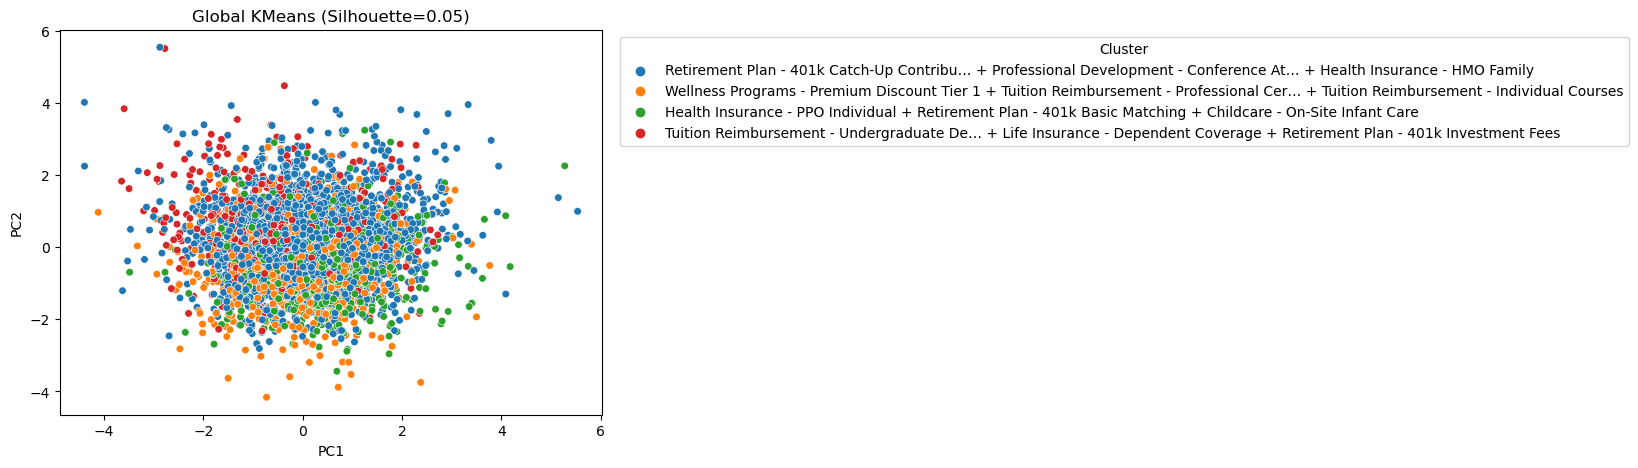


KMeans — Global — cluster summaries:
  • Retirement Plan - 401k Catch-Up Contribu… + Professional Development - Conference At… + Health Insurance - HMO Family  |  Top: Retirement Plan - 401k Catch-Up Contributions, Professional Development - Conference Attendance, Health Insurance - HMO Family  |  Skews: —
  • Health Insurance - PPO Individual + Retirement Plan - 401k Basic Matching + Childcare - On-Site Infant Care  |  Top: Health Insurance - PPO Individual, Retirement Plan - 401k Basic Matching, Childcare - On-Site Infant Care  |  Skews: —
  • Wellness Programs - Premium Discount Tier 1 + Tuition Reimbursement - Professional Cer… + Tuition Reimbursement - Individual Courses  |  Top: Wellness Programs - Premium Discount Tier 1, Tuition Reimbursement - Professional Certification, Tuition Reimbursement - Individual Courses  |  Skews: —
  • Tuition Reimbursement - Undergraduate De… + Life Insurance - Dependent Coverage + Retirement Plan - 401k Investment Fees  |  Top: Tuition Reimbursem

C:\Users\Mayukh Sen\AppData\Local\Temp\ipykernel_23204\3734768921.py:99: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(); plt.show()


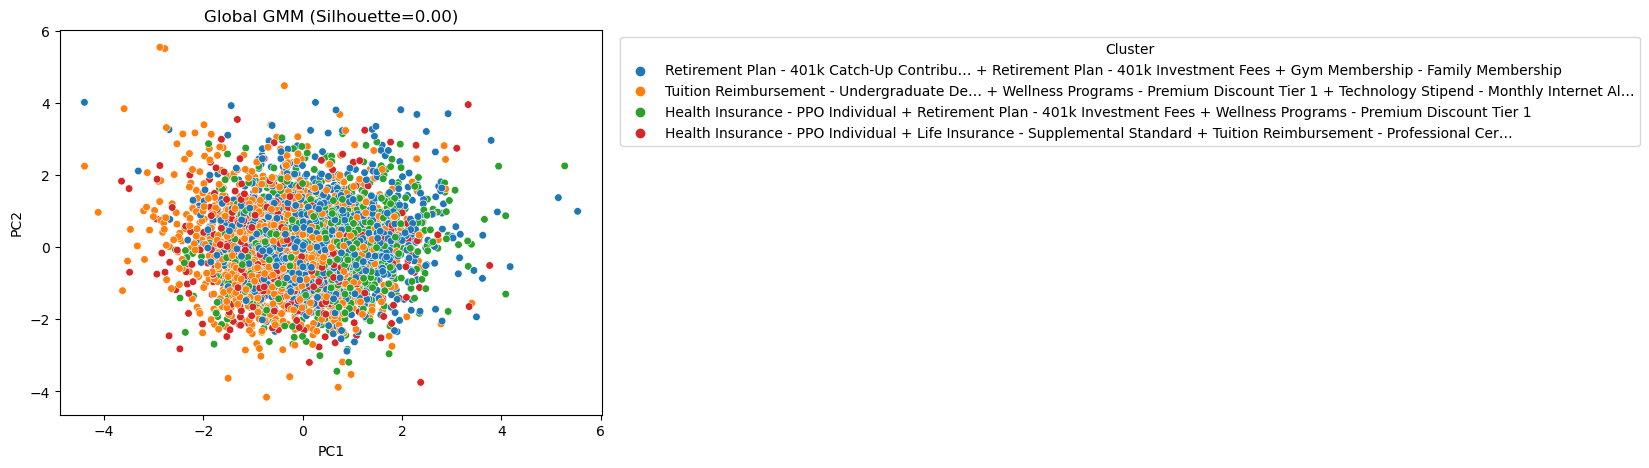


GMM — Global — cluster summaries:
  • Retirement Plan - 401k Catch-Up Contribu… + Retirement Plan - 401k Investment Fees + Gym Membership - Family Membership  |  Top: Retirement Plan - 401k Catch-Up Contributions, Retirement Plan - 401k Investment Fees, Gym Membership - Family Membership  |  Skews: —
  • Health Insurance - PPO Individual + Retirement Plan - 401k Investment Fees + Wellness Programs - Premium Discount Tier 1  |  Top: Health Insurance - PPO Individual, Retirement Plan - 401k Investment Fees, Wellness Programs - Premium Discount Tier 1  |  Skews: —
  • Tuition Reimbursement - Undergraduate De… + Wellness Programs - Premium Discount Tier 1 + Technology Stipend - Monthly Internet Al…  |  Top: Tuition Reimbursement - Undergraduate Degree, Wellness Programs - Premium Discount Tier 1, Technology Stipend - Monthly Internet Allowance  |  Skews: —
  • Health Insurance - PPO Individual + Life Insurance - Supplemental Standard + Tuition Reimbursement - Professional Cer…  |  Top: He

C:\Users\Mayukh Sen\AppData\Local\Temp\ipykernel_23204\3734768921.py:99: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(); plt.show()


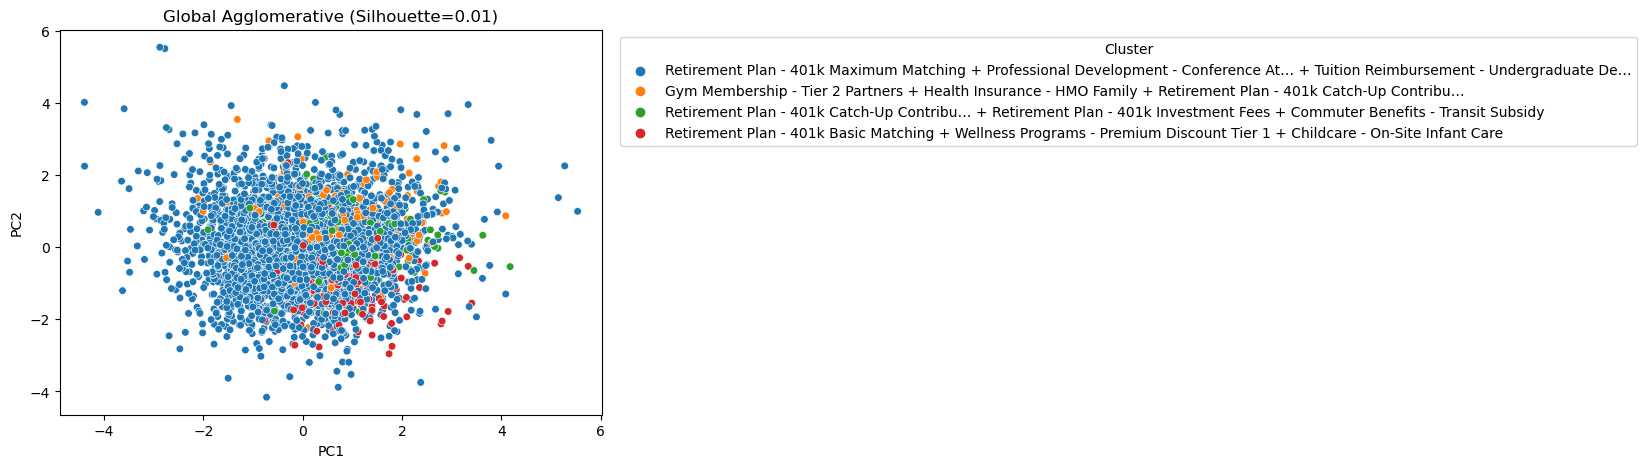


Agglomerative — Global — cluster summaries:
  • Retirement Plan - 401k Maximum Matching + Professional Development - Conference At… + Tuition Reimbursement - Undergraduate De…  |  Top: Retirement Plan - 401k Maximum Matching, Professional Development - Conference Attendance, Tuition Reimbursement - Undergraduate Degree  |  Skews: —
  • Retirement Plan - 401k Basic Matching + Wellness Programs - Premium Discount Tier 1 + Childcare - On-Site Infant Care  |  Top: Retirement Plan - 401k Basic Matching, Wellness Programs - Premium Discount Tier 1, Childcare - On-Site Infant Care  |  Skews: —
  • Gym Membership - Tier 2 Partners + Health Insurance - HMO Family + Retirement Plan - 401k Catch-Up Contribu…  |  Top: Gym Membership - Tier 2 Partners, Health Insurance - HMO Family, Retirement Plan - 401k Catch-Up Contributions  |  Skews: —
  • Retirement Plan - 401k Catch-Up Contribu… + Retirement Plan - 401k Investment Fees + Commuter Benefits - Transit Subsidy  |  Top: Retirement Plan - 401k Ca

C:\Users\Mayukh Sen\AppData\Local\Temp\ipykernel_23204\3734768921.py:99: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(); plt.show()


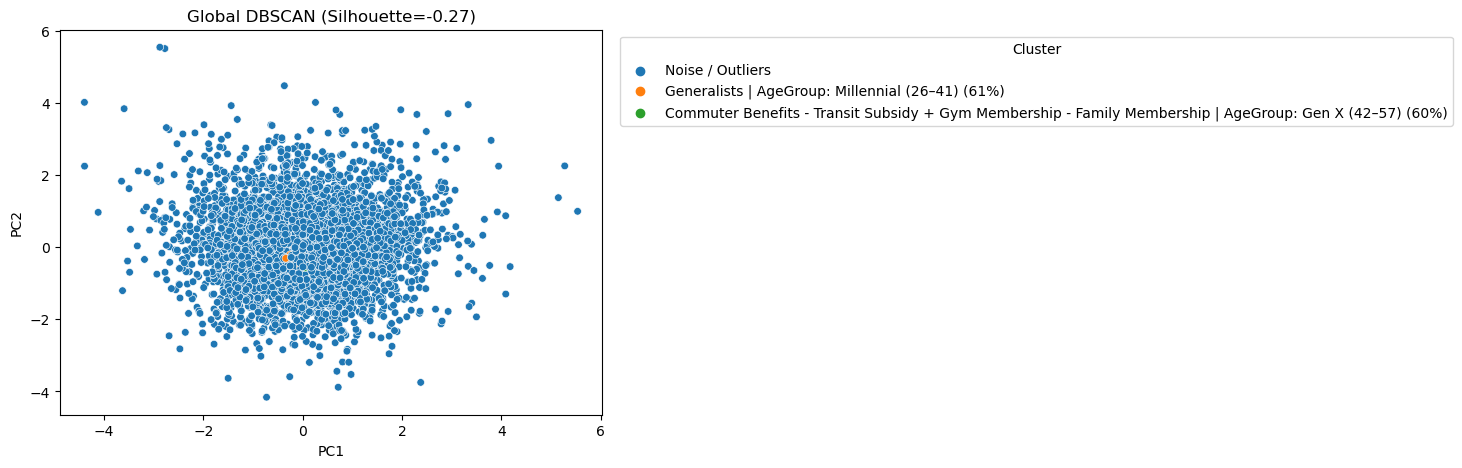


DBSCAN — Global — cluster summaries:
  • Noise / Outliers: DBSCAN noise/outliers
  • Commuter Benefits - Transit Subsidy + Gym Membership - Family Membership | AgeGroup: Gen X (42–57) (60%)  |  Top: Commuter Benefits - Transit Subsidy, Gym Membership - Family Membership  |  Skews: AgeGroup=Gen X (42–57) (60%)
  • Generalists | AgeGroup: Millennial (26–41) (61%)  |  Top: —  |  Skews: AgeGroup=Millennial (26–41) (61%)

=== AgeGroup = Boomer (58+) (named) ===


d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Mayukh Sen\AppData\Local\Temp\ipykernel_23204\3734768921.py:99: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(); plt.show()


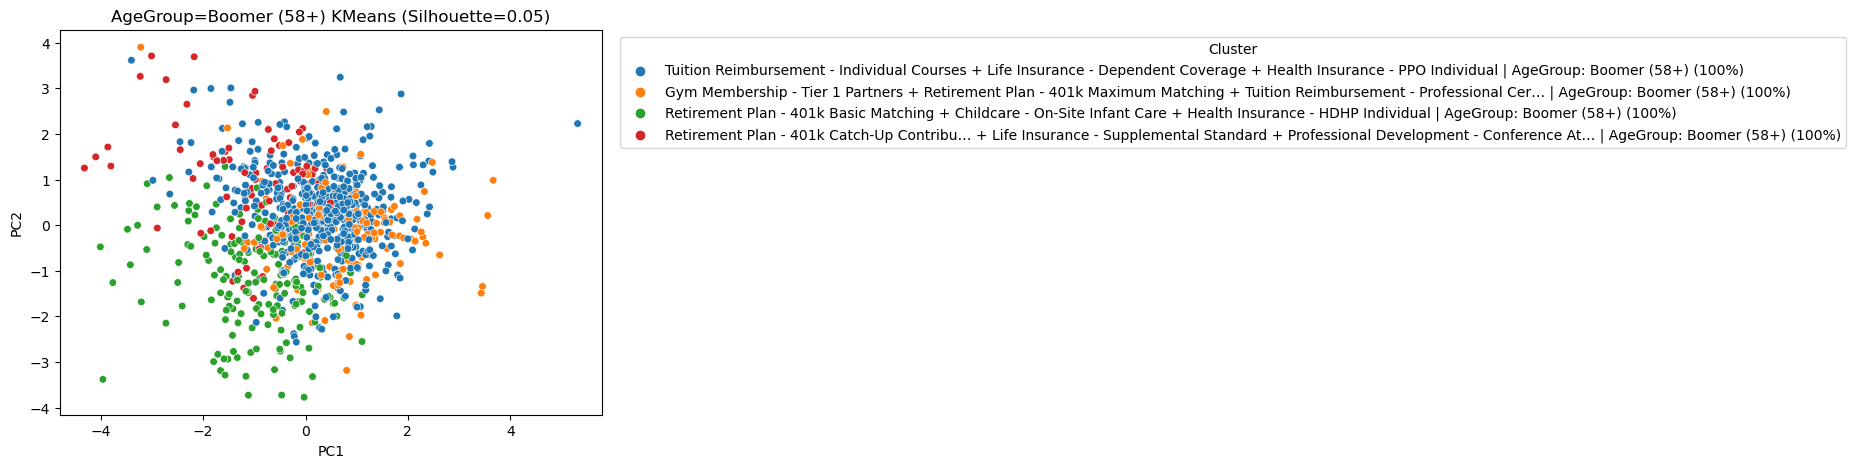


KMeans — AgeGroup=Boomer (58+) — cluster summaries:
  • Tuition Reimbursement - Individual Courses + Life Insurance - Dependent Coverage + Health Insurance - PPO Individual | AgeGroup: Boomer (58+) (100%)  |  Top: Tuition Reimbursement - Individual Courses, Life Insurance - Dependent Coverage, Health Insurance - PPO Individual  |  Skews: AgeGroup=Boomer (58+) (100%)
  • Retirement Plan - 401k Basic Matching + Childcare - On-Site Infant Care + Health Insurance - HDHP Individual | AgeGroup: Boomer (58+) (100%)  |  Top: Retirement Plan - 401k Basic Matching, Childcare - On-Site Infant Care, Health Insurance - HDHP Individual  |  Skews: AgeGroup=Boomer (58+) (100%)
  • Retirement Plan - 401k Catch-Up Contribu… + Life Insurance - Supplemental Standard + Professional Development - Conference At… | AgeGroup: Boomer (58+) (100%)  |  Top: Retirement Plan - 401k Catch-Up Contributions, Life Insurance - Supplemental Standard, Professional Development - Conference Attendance  |  Skews: AgeGroup=B

d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Mayukh Sen\AppData\Local\Temp\ipykernel_23204\3734768921.py:99: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(); plt.show()


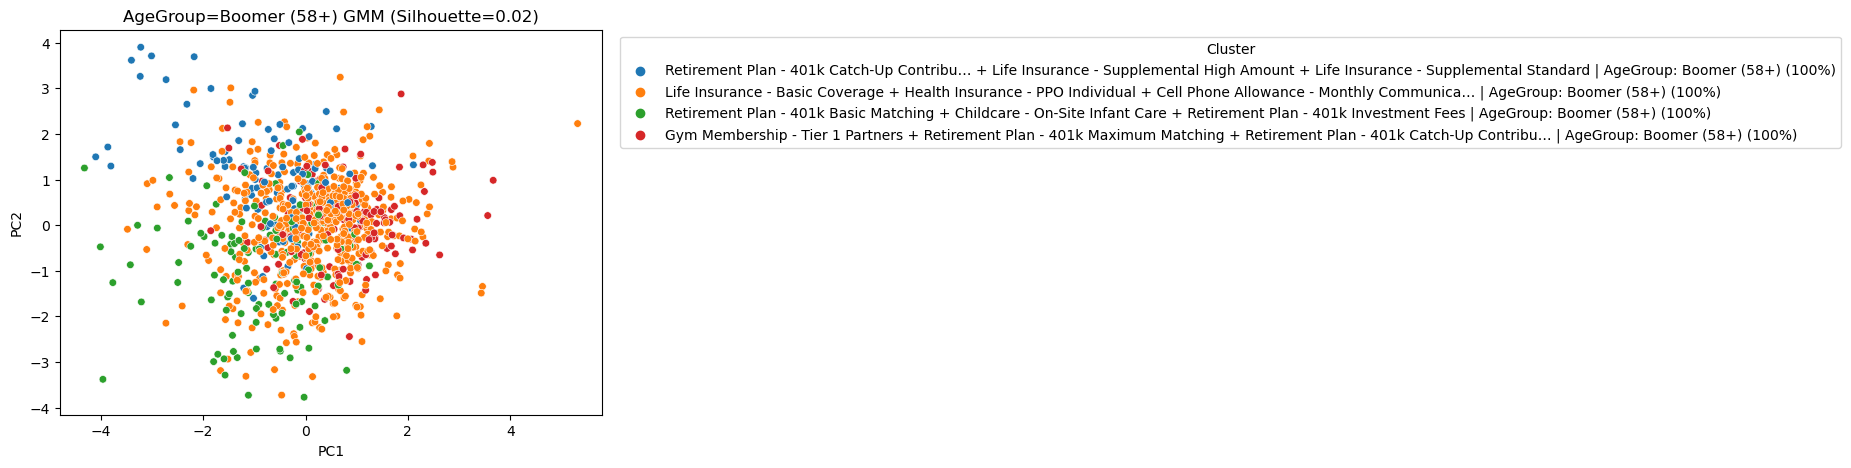


GMM — AgeGroup=Boomer (58+) — cluster summaries:
  • Life Insurance - Basic Coverage + Health Insurance - PPO Individual + Cell Phone Allowance - Monthly Communica… | AgeGroup: Boomer (58+) (100%)  |  Top: Life Insurance - Basic Coverage, Health Insurance - PPO Individual, Cell Phone Allowance - Monthly Communications  |  Skews: AgeGroup=Boomer (58+) (100%)
  • Retirement Plan - 401k Basic Matching + Childcare - On-Site Infant Care + Retirement Plan - 401k Investment Fees | AgeGroup: Boomer (58+) (100%)  |  Top: Retirement Plan - 401k Basic Matching, Childcare - On-Site Infant Care, Retirement Plan - 401k Investment Fees  |  Skews: AgeGroup=Boomer (58+) (100%)
  • Retirement Plan - 401k Catch-Up Contribu… + Life Insurance - Supplemental High Amount + Life Insurance - Supplemental Standard | AgeGroup: Boomer (58+) (100%)  |  Top: Retirement Plan - 401k Catch-Up Contributions, Life Insurance - Supplemental High Amount, Life Insurance - Supplemental Standard  |  Skews: AgeGroup=Boomer (5

C:\Users\Mayukh Sen\AppData\Local\Temp\ipykernel_23204\3734768921.py:99: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(); plt.show()


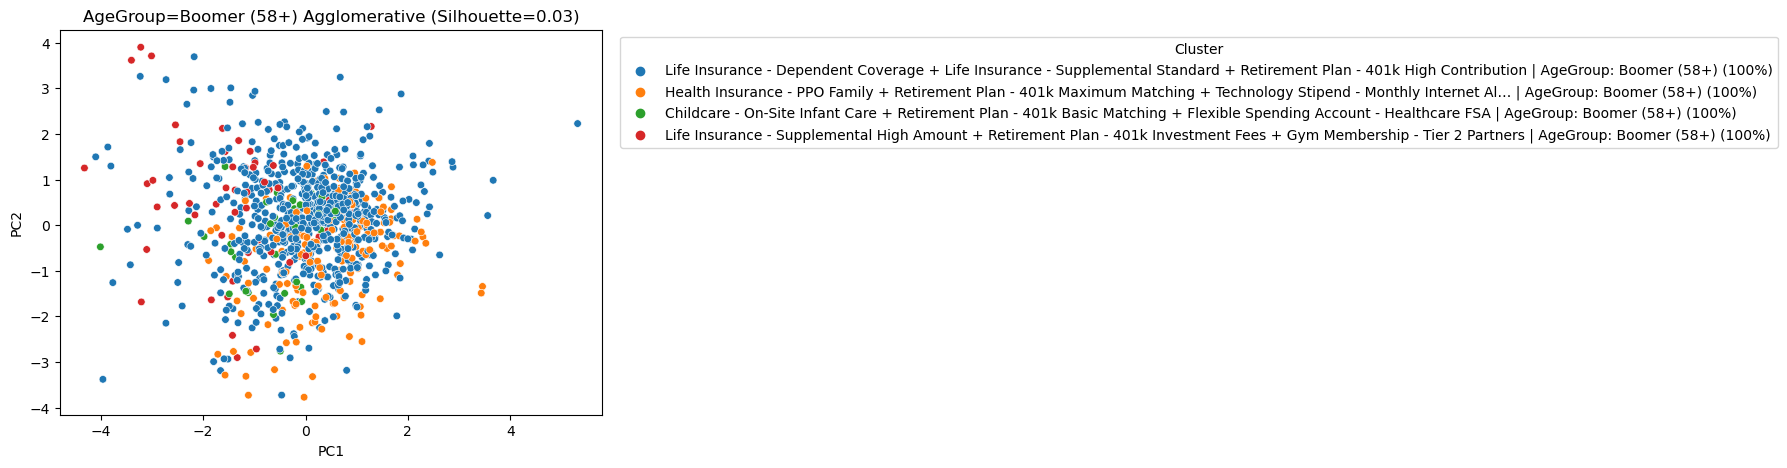


Agglomerative — AgeGroup=Boomer (58+) — cluster summaries:
  • Life Insurance - Dependent Coverage + Life Insurance - Supplemental Standard + Retirement Plan - 401k High Contribution | AgeGroup: Boomer (58+) (100%)  |  Top: Life Insurance - Dependent Coverage, Life Insurance - Supplemental Standard, Retirement Plan - 401k High Contribution  |  Skews: AgeGroup=Boomer (58+) (100%)
  • Life Insurance - Supplemental High Amount + Retirement Plan - 401k Investment Fees + Gym Membership - Tier 2 Partners | AgeGroup: Boomer (58+) (100%)  |  Top: Life Insurance - Supplemental High Amount, Retirement Plan - 401k Investment Fees, Gym Membership - Tier 2 Partners  |  Skews: AgeGroup=Boomer (58+) (100%)
  • Health Insurance - PPO Family + Retirement Plan - 401k Maximum Matching + Technology Stipend - Monthly Internet Al… | AgeGroup: Boomer (58+) (100%)  |  Top: Health Insurance - PPO Family, Retirement Plan - 401k Maximum Matching, Technology Stipend - Monthly Internet Allowance  |  Skews: AgeGro

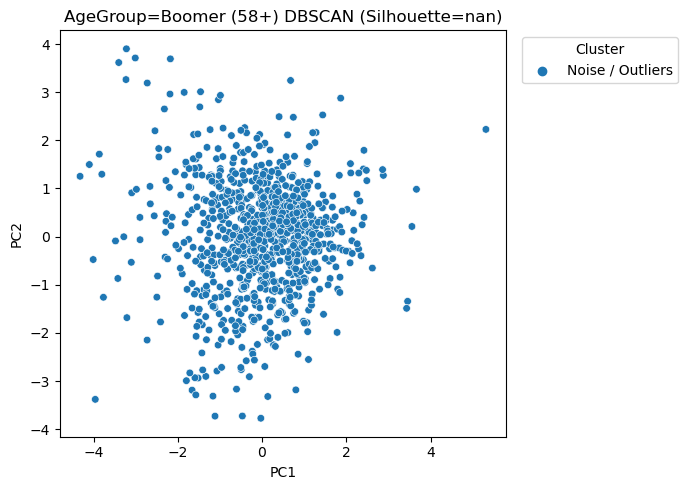


DBSCAN — AgeGroup=Boomer (58+) — cluster summaries:
  • Noise / Outliers: DBSCAN noise/outliers

=== AgeGroup = Millennial (26–41) (named) ===


d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\Mayukh Sen\AppData\Local\Temp\ipykernel_23204\3734768921.py:99: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(); plt.show()


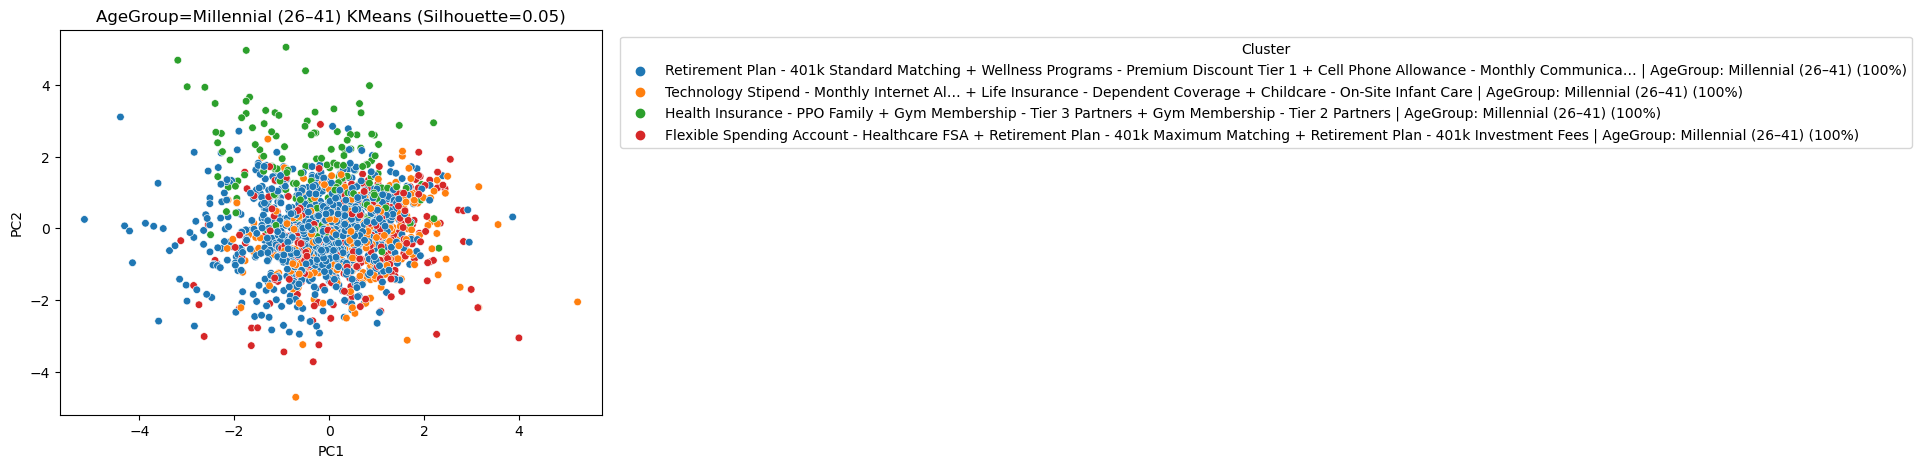


KMeans — AgeGroup=Millennial (26–41) — cluster summaries:
  • Technology Stipend - Monthly Internet Al… + Life Insurance - Dependent Coverage + Childcare - On-Site Infant Care | AgeGroup: Millennial (26–41) (100%)  |  Top: Technology Stipend - Monthly Internet Allowance, Life Insurance - Dependent Coverage, Childcare - On-Site Infant Care  |  Skews: AgeGroup=Millennial (26–41) (100%)
  • Flexible Spending Account - Healthcare FSA + Retirement Plan - 401k Maximum Matching + Retirement Plan - 401k Investment Fees | AgeGroup: Millennial (26–41) (100%)  |  Top: Flexible Spending Account - Healthcare FSA, Retirement Plan - 401k Maximum Matching, Retirement Plan - 401k Investment Fees  |  Skews: AgeGroup=Millennial (26–41) (100%)
  • Retirement Plan - 401k Standard Matching + Wellness Programs - Premium Discount Tier 1 + Cell Phone Allowance - Monthly Communica… | AgeGroup: Millennial (26–41) (100%)  |  Top: Retirement Plan - 401k Standard Matching, Wellness Programs - Premium Discount Tier

d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\Mayukh Sen\AppData\Local\Temp\ipykernel_23204\3734768921.py:99: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(); plt.show()


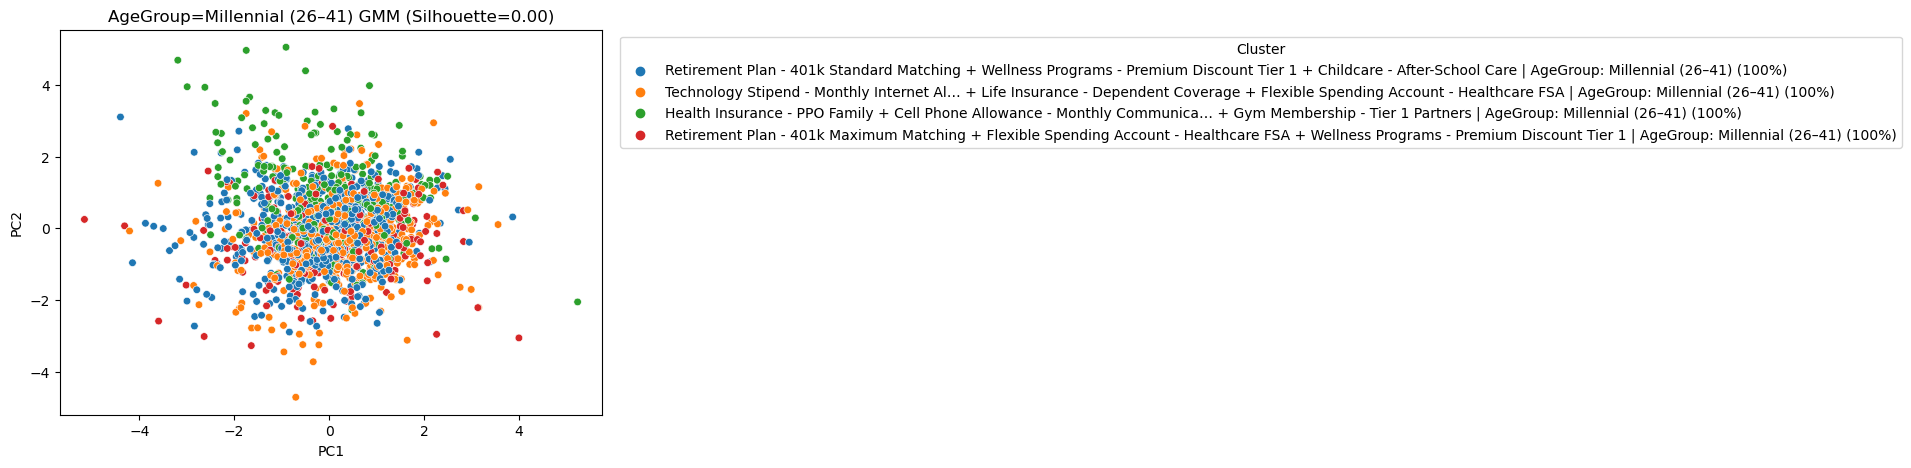


GMM — AgeGroup=Millennial (26–41) — cluster summaries:
  • Technology Stipend - Monthly Internet Al… + Life Insurance - Dependent Coverage + Flexible Spending Account - Healthcare FSA | AgeGroup: Millennial (26–41) (100%)  |  Top: Technology Stipend - Monthly Internet Allowance, Life Insurance - Dependent Coverage, Flexible Spending Account - Healthcare FSA  |  Skews: AgeGroup=Millennial (26–41) (100%)
  • Retirement Plan - 401k Maximum Matching + Flexible Spending Account - Healthcare FSA + Wellness Programs - Premium Discount Tier 1 | AgeGroup: Millennial (26–41) (100%)  |  Top: Retirement Plan - 401k Maximum Matching, Flexible Spending Account - Healthcare FSA, Wellness Programs - Premium Discount Tier 1  |  Skews: AgeGroup=Millennial (26–41) (100%)
  • Retirement Plan - 401k Standard Matching + Wellness Programs - Premium Discount Tier 1 + Childcare - After-School Care | AgeGroup: Millennial (26–41) (100%)  |  Top: Retirement Plan - 401k Standard Matching, Wellness Programs - Prem

C:\Users\Mayukh Sen\AppData\Local\Temp\ipykernel_23204\3734768921.py:99: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(); plt.show()


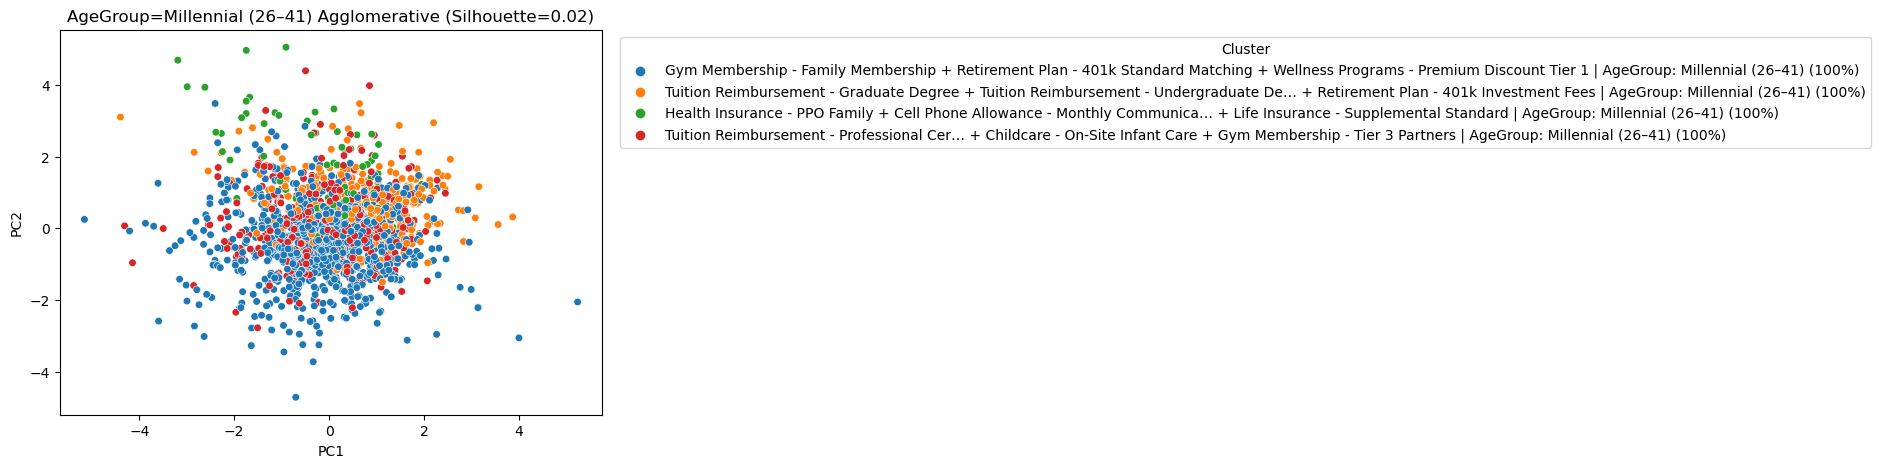


Agglomerative — AgeGroup=Millennial (26–41) — cluster summaries:
  • Tuition Reimbursement - Graduate Degree + Tuition Reimbursement - Undergraduate De… + Retirement Plan - 401k Investment Fees | AgeGroup: Millennial (26–41) (100%)  |  Top: Tuition Reimbursement - Graduate Degree, Tuition Reimbursement - Undergraduate Degree, Retirement Plan - 401k Investment Fees  |  Skews: AgeGroup=Millennial (26–41) (100%)
  • Tuition Reimbursement - Professional Cer… + Childcare - On-Site Infant Care + Gym Membership - Tier 3 Partners | AgeGroup: Millennial (26–41) (100%)  |  Top: Tuition Reimbursement - Professional Certification, Childcare - On-Site Infant Care, Gym Membership - Tier 3 Partners  |  Skews: AgeGroup=Millennial (26–41) (100%)
  • Health Insurance - PPO Family + Cell Phone Allowance - Monthly Communica… + Life Insurance - Supplemental Standard | AgeGroup: Millennial (26–41) (100%)  |  Top: Health Insurance - PPO Family, Cell Phone Allowance - Monthly Communications, Life Insurance -

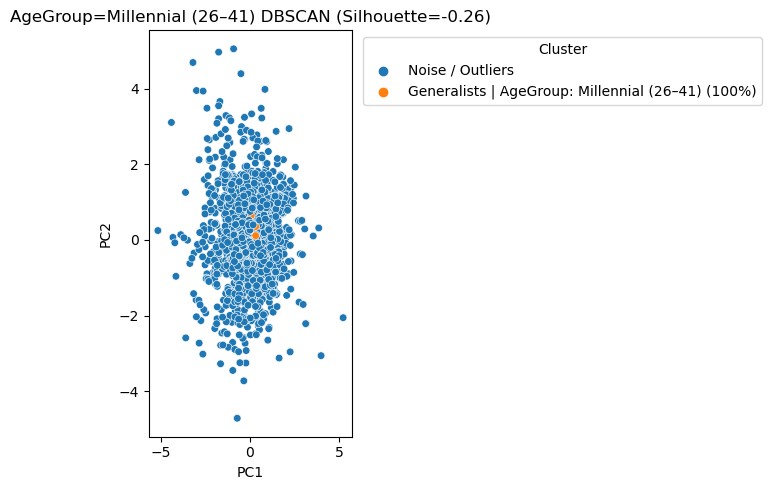


DBSCAN — AgeGroup=Millennial (26–41) — cluster summaries:
  • Noise / Outliers: DBSCAN noise/outliers
  • Generalists | AgeGroup: Millennial (26–41) (100%)  |  Top: —  |  Skews: AgeGroup=Millennial (26–41) (100%)

=== AgeGroup = Gen X (42–57) (named) ===


d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\Mayukh Sen\AppData\Local\Temp\ipykernel_23204\3734768921.py:99: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(); plt.show()


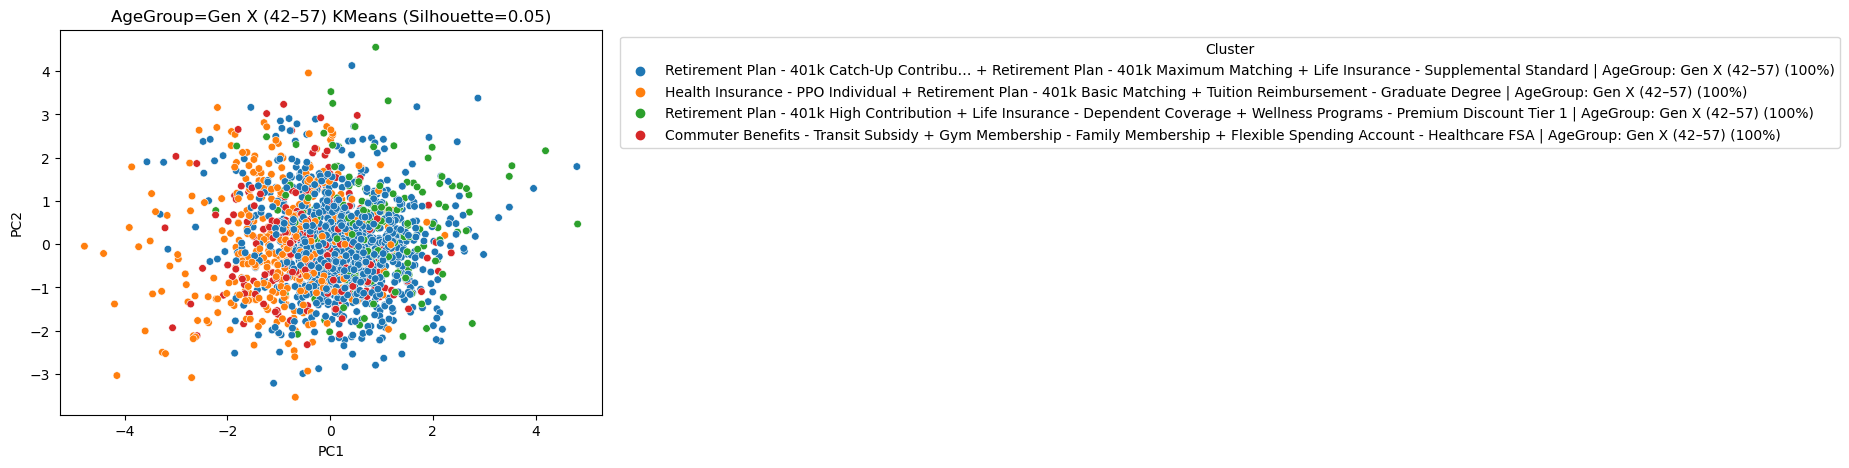


KMeans — AgeGroup=Gen X (42–57) — cluster summaries:
  • Retirement Plan - 401k High Contribution + Life Insurance - Dependent Coverage + Wellness Programs - Premium Discount Tier 1 | AgeGroup: Gen X (42–57) (100%)  |  Top: Retirement Plan - 401k High Contribution, Life Insurance - Dependent Coverage, Wellness Programs - Premium Discount Tier 1  |  Skews: AgeGroup=Gen X (42–57) (100%)
  • Health Insurance - PPO Individual + Retirement Plan - 401k Basic Matching + Tuition Reimbursement - Graduate Degree | AgeGroup: Gen X (42–57) (100%)  |  Top: Health Insurance - PPO Individual, Retirement Plan - 401k Basic Matching, Tuition Reimbursement - Graduate Degree  |  Skews: AgeGroup=Gen X (42–57) (100%)
  • Retirement Plan - 401k Catch-Up Contribu… + Retirement Plan - 401k Maximum Matching + Life Insurance - Supplemental Standard | AgeGroup: Gen X (42–57) (100%)  |  Top: Retirement Plan - 401k Catch-Up Contributions, Retirement Plan - 401k Maximum Matching, Life Insurance - Supplemental Stand

d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\Mayukh Sen\AppData\Local\Temp\ipykernel_23204\3734768921.py:99: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(); plt.show()


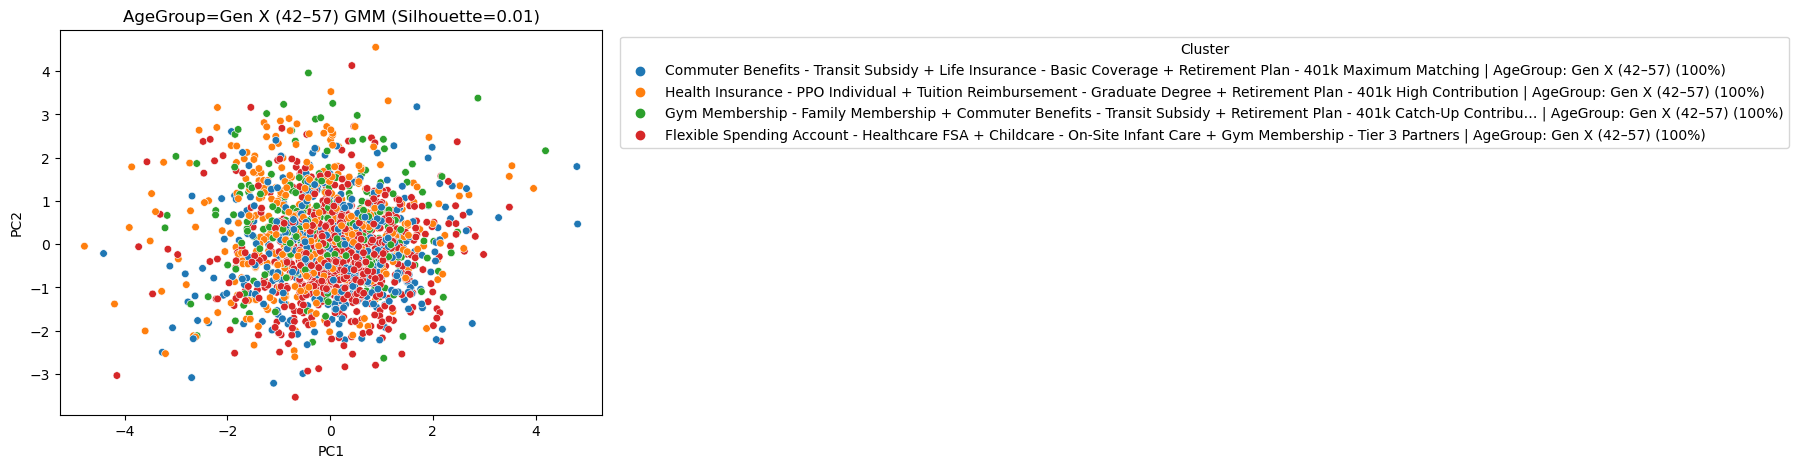


GMM — AgeGroup=Gen X (42–57) — cluster summaries:
  • Commuter Benefits - Transit Subsidy + Life Insurance - Basic Coverage + Retirement Plan - 401k Maximum Matching | AgeGroup: Gen X (42–57) (100%)  |  Top: Commuter Benefits - Transit Subsidy, Life Insurance - Basic Coverage, Retirement Plan - 401k Maximum Matching  |  Skews: AgeGroup=Gen X (42–57) (100%)
  • Health Insurance - PPO Individual + Tuition Reimbursement - Graduate Degree + Retirement Plan - 401k High Contribution | AgeGroup: Gen X (42–57) (100%)  |  Top: Health Insurance - PPO Individual, Tuition Reimbursement - Graduate Degree, Retirement Plan - 401k High Contribution  |  Skews: AgeGroup=Gen X (42–57) (100%)
  • Flexible Spending Account - Healthcare FSA + Childcare - On-Site Infant Care + Gym Membership - Tier 3 Partners | AgeGroup: Gen X (42–57) (100%)  |  Top: Flexible Spending Account - Healthcare FSA, Childcare - On-Site Infant Care, Gym Membership - Tier 3 Partners  |  Skews: AgeGroup=Gen X (42–57) (100%)
  • Gym 

C:\Users\Mayukh Sen\AppData\Local\Temp\ipykernel_23204\3734768921.py:99: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(); plt.show()


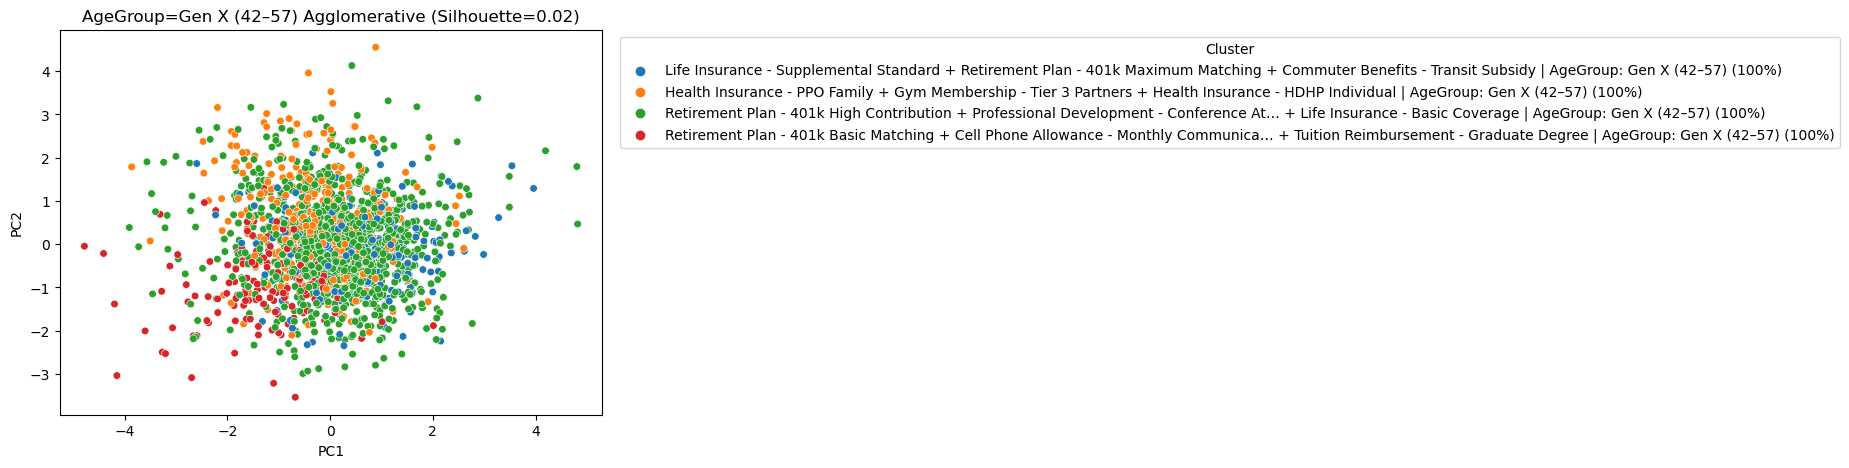


Agglomerative — AgeGroup=Gen X (42–57) — cluster summaries:
  • Life Insurance - Supplemental Standard + Retirement Plan - 401k Maximum Matching + Commuter Benefits - Transit Subsidy | AgeGroup: Gen X (42–57) (100%)  |  Top: Life Insurance - Supplemental Standard, Retirement Plan - 401k Maximum Matching, Commuter Benefits - Transit Subsidy  |  Skews: AgeGroup=Gen X (42–57) (100%)
  • Health Insurance - PPO Family + Gym Membership - Tier 3 Partners + Health Insurance - HDHP Individual | AgeGroup: Gen X (42–57) (100%)  |  Top: Health Insurance - PPO Family, Gym Membership - Tier 3 Partners, Health Insurance - HDHP Individual  |  Skews: AgeGroup=Gen X (42–57) (100%)
  • Retirement Plan - 401k High Contribution + Professional Development - Conference At… + Life Insurance - Basic Coverage | AgeGroup: Gen X (42–57) (100%)  |  Top: Retirement Plan - 401k High Contribution, Professional Development - Conference Attendance, Life Insurance - Basic Coverage  |  Skews: AgeGroup=Gen X (42–57) (100

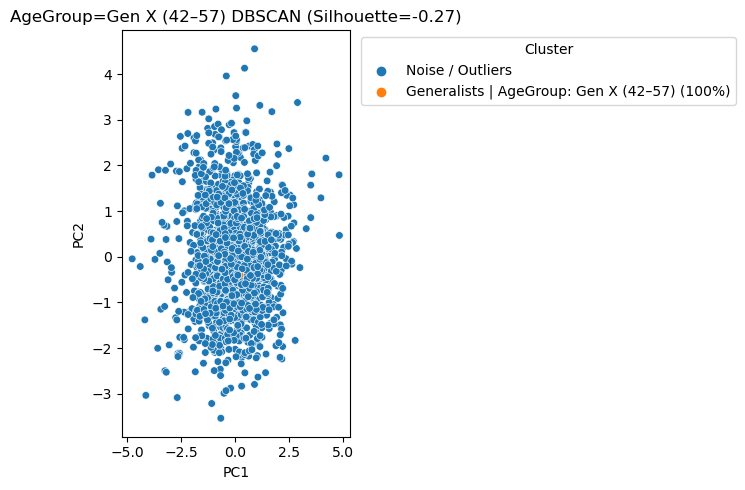


DBSCAN — AgeGroup=Gen X (42–57) — cluster summaries:
  • Noise / Outliers: DBSCAN noise/outliers
  • Generalists | AgeGroup: Gen X (42–57) (100%)  |  Top: —  |  Skews: AgeGroup=Gen X (42–57) (100%)

=== AgeGroup = Gen Z (18–25) (named) ===


d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Mayukh Sen\AppData\Local\Temp\ipykernel_23204\3734768921.py:99: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(); plt.show()


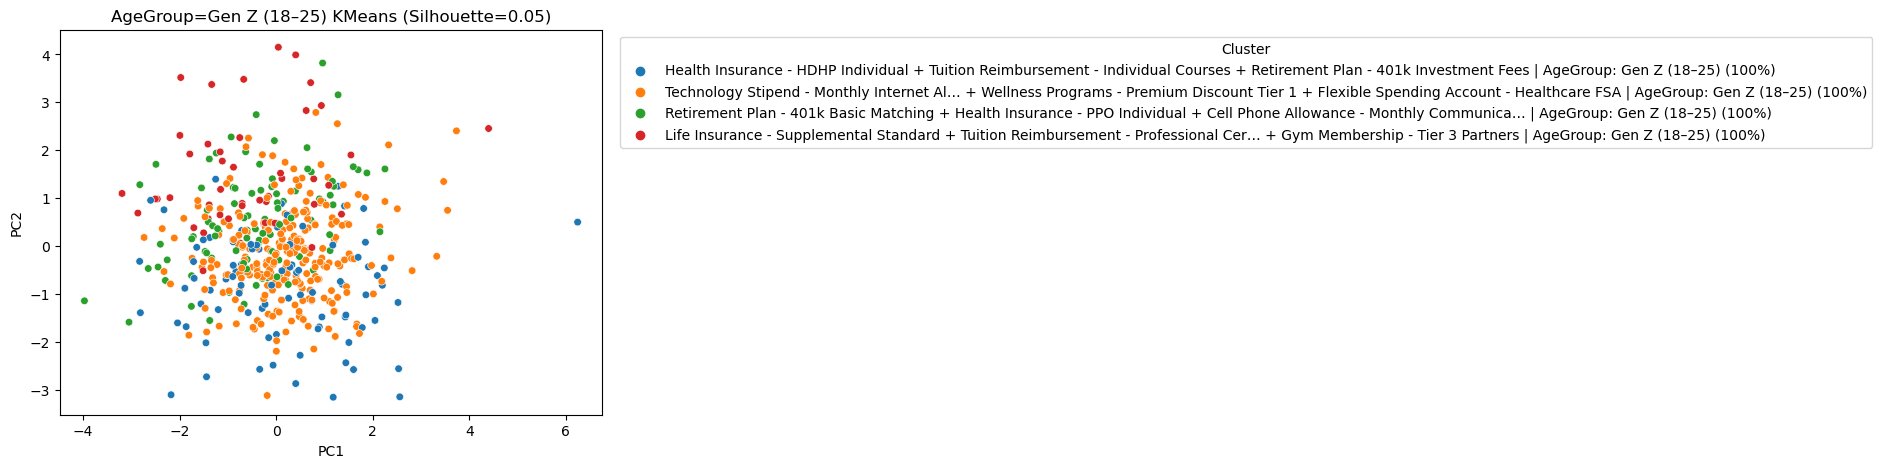


KMeans — AgeGroup=Gen Z (18–25) — cluster summaries:
  • Health Insurance - HDHP Individual + Tuition Reimbursement - Individual Courses + Retirement Plan - 401k Investment Fees | AgeGroup: Gen Z (18–25) (100%)  |  Top: Health Insurance - HDHP Individual, Tuition Reimbursement - Individual Courses, Retirement Plan - 401k Investment Fees  |  Skews: AgeGroup=Gen Z (18–25) (100%)
  • Life Insurance - Supplemental Standard + Tuition Reimbursement - Professional Cer… + Gym Membership - Tier 3 Partners | AgeGroup: Gen Z (18–25) (100%)  |  Top: Life Insurance - Supplemental Standard, Tuition Reimbursement - Professional Certification, Gym Membership - Tier 3 Partners  |  Skews: AgeGroup=Gen Z (18–25) (100%)
  • Retirement Plan - 401k Basic Matching + Health Insurance - PPO Individual + Cell Phone Allowance - Monthly Communica… | AgeGroup: Gen Z (18–25) (100%)  |  Top: Retirement Plan - 401k Basic Matching, Health Insurance - PPO Individual, Cell Phone Allowance - Monthly Communications  |  S

d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Mayukh Sen\AppData\Local\Temp\ipykernel_23204\3734768921.py:99: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(); plt.show()


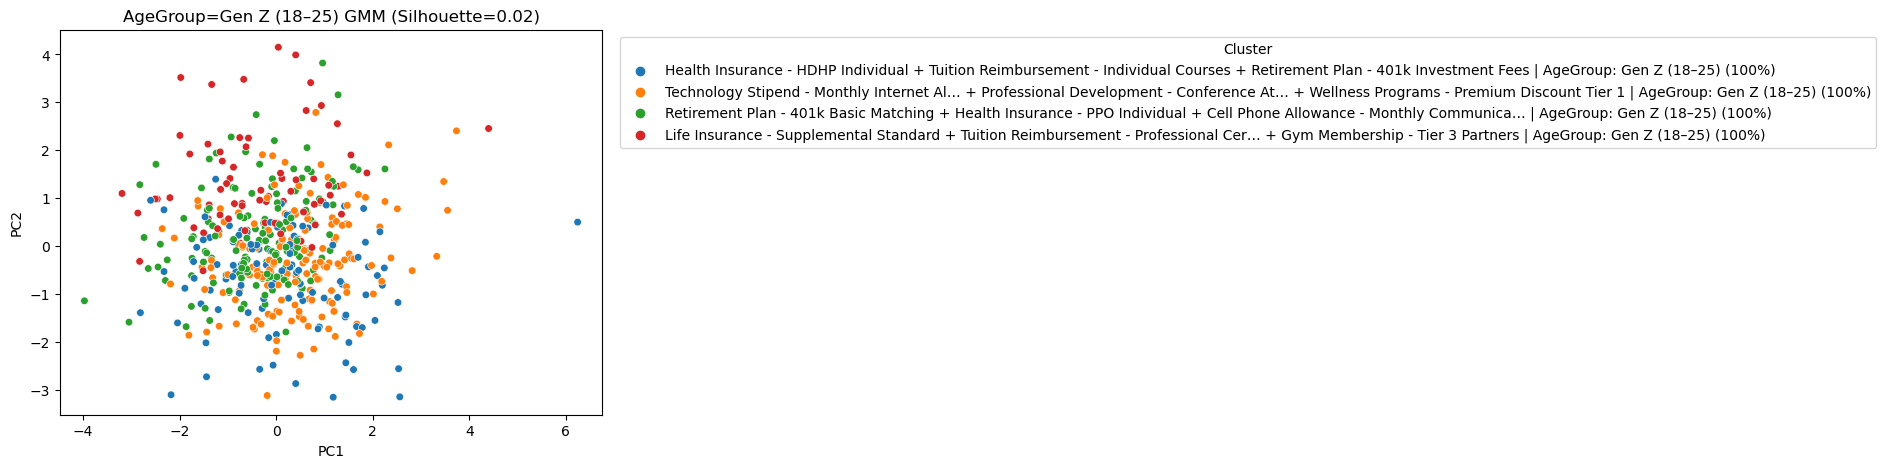


GMM — AgeGroup=Gen Z (18–25) — cluster summaries:
  • Health Insurance - HDHP Individual + Tuition Reimbursement - Individual Courses + Retirement Plan - 401k Investment Fees | AgeGroup: Gen Z (18–25) (100%)  |  Top: Health Insurance - HDHP Individual, Tuition Reimbursement - Individual Courses, Retirement Plan - 401k Investment Fees  |  Skews: AgeGroup=Gen Z (18–25) (100%)
  • Life Insurance - Supplemental Standard + Tuition Reimbursement - Professional Cer… + Gym Membership - Tier 3 Partners | AgeGroup: Gen Z (18–25) (100%)  |  Top: Life Insurance - Supplemental Standard, Tuition Reimbursement - Professional Certification, Gym Membership - Tier 3 Partners  |  Skews: AgeGroup=Gen Z (18–25) (100%)
  • Retirement Plan - 401k Basic Matching + Health Insurance - PPO Individual + Cell Phone Allowance - Monthly Communica… | AgeGroup: Gen Z (18–25) (100%)  |  Top: Retirement Plan - 401k Basic Matching, Health Insurance - PPO Individual, Cell Phone Allowance - Monthly Communications  |  Skew

C:\Users\Mayukh Sen\AppData\Local\Temp\ipykernel_23204\3734768921.py:99: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(); plt.show()


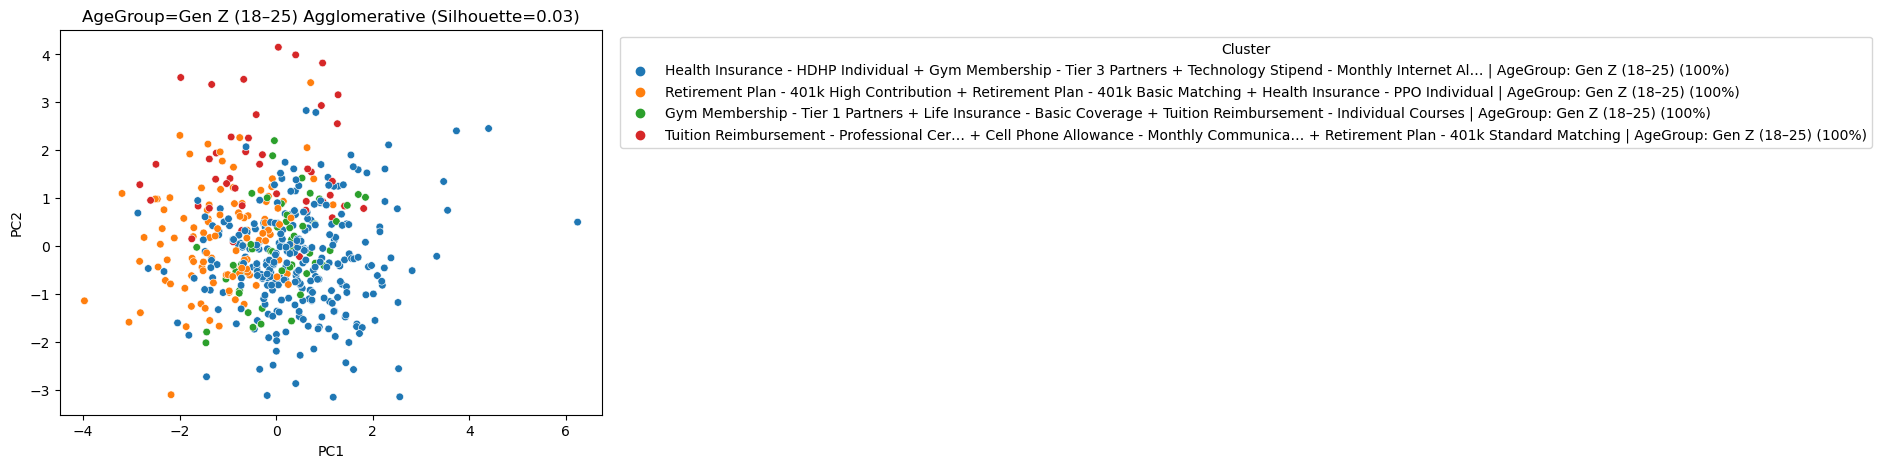


Agglomerative — AgeGroup=Gen Z (18–25) — cluster summaries:
  • Health Insurance - HDHP Individual + Gym Membership - Tier 3 Partners + Technology Stipend - Monthly Internet Al… | AgeGroup: Gen Z (18–25) (100%)  |  Top: Health Insurance - HDHP Individual, Gym Membership - Tier 3 Partners, Technology Stipend - Monthly Internet Allowance  |  Skews: AgeGroup=Gen Z (18–25) (100%)
  • Retirement Plan - 401k High Contribution + Retirement Plan - 401k Basic Matching + Health Insurance - PPO Individual | AgeGroup: Gen Z (18–25) (100%)  |  Top: Retirement Plan - 401k High Contribution, Retirement Plan - 401k Basic Matching, Health Insurance - PPO Individual  |  Skews: AgeGroup=Gen Z (18–25) (100%)
  • Tuition Reimbursement - Professional Cer… + Cell Phone Allowance - Monthly Communica… + Retirement Plan - 401k Standard Matching | AgeGroup: Gen Z (18–25) (100%)  |  Top: Tuition Reimbursement - Professional Certification, Cell Phone Allowance - Monthly Communications, Retirement Plan - 401k Stan

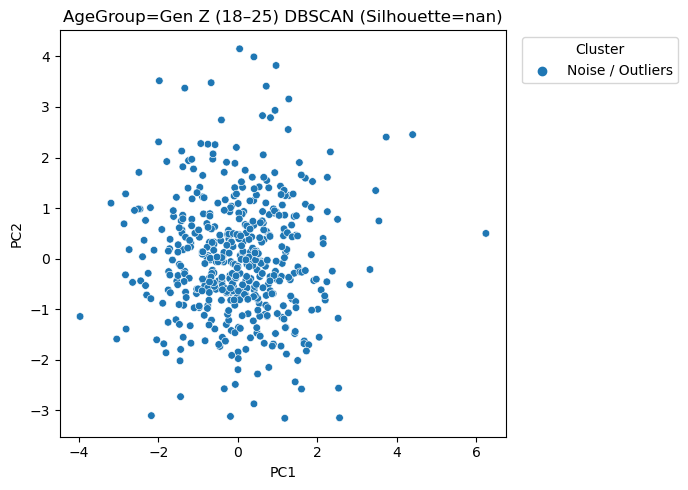


DBSCAN — AgeGroup=Gen Z (18–25) — cluster summaries:
  • Noise / Outliers: DBSCAN noise/outliers


In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# --------------------------
# Helper: human-friendly cluster names
# --------------------------
def make_cluster_names(X_df, labels, meta_df=None, topn=3, min_dom_frac=0.55):
    """
    X_df: numeric usage matrix (columns = BenefitFull or encoded benefit columns)
    labels: 1D array of ints from clustering
    meta_df: optional subset of meta columns aligned with X_df rows (AgeGroup/Gender/Department)
    """
    overall_mean = X_df.mean(axis=0)
    names = {}
    summaries = {}

    # Prepare simple display names
    def short(col):
        s = str(col)
        return (s[:40] + "…") if len(s) > 43 else s

    for c in sorted(set(labels)):
        if c == -1:  # DBSCAN noise
            names[c] = "Noise / Outliers"
            summaries[c] = {"top_features": [], "dom_meta": {}}
            continue

        mask = labels == c
        cl_mean = X_df[mask].mean(axis=0)
        # Over-index vs overall
        lift = (cl_mean - overall_mean)
        # Pick top features with positive lift
        top_feats = lift.sort_values(ascending=False).head(topn)
        top_feats = top_feats[top_feats > 0]

        if len(top_feats) == 0:
            label_core = "Generalists"
        else:
            label_core = " + ".join([short(f) for f in top_feats.index.tolist()])

        dom_meta = {}
        if meta_df is not None and not meta_df.empty:
            for col in [c for c in ["AgeGroup", "Gender", "Department"] if c in meta_df.columns]:
                vc = meta_df.loc[mask, col].value_counts(normalize=True, dropna=True)
                if not vc.empty and vc.iloc[0] >= min_dom_frac:
                    dom_meta[col] = f"{vc.index[0]} ({vc.iloc[0]*100:.0f}%)"

        # Append a dominant demographic if any
        if dom_meta:
            demo_str = ", ".join([f"{k}: {v}" for k, v in dom_meta.items()])
            full_name = f"{label_core} | {demo_str}"
        else:
            full_name = label_core

        names[c] = full_name if full_name else f"Cluster {c}"
        summaries[c] = {"top_features": top_feats, "dom_meta": dom_meta}

    return names, summaries

# --------------------------
# Runner that uses names in plots
# --------------------------
def run_clustering_named(X_scaled, X_2d, X_df_for_names, meta_for_names=None, title_prefix="", n_clusters=4):
    models = {
        "KMeans": KMeans(n_clusters=n_clusters, random_state=42, n_init="auto"),
        "GMM": GaussianMixture(n_components=n_clusters, random_state=42),
        "Agglomerative": AgglomerativeClustering(n_clusters=n_clusters, linkage="ward"),
        "DBSCAN": DBSCAN(eps=1.0, min_samples=5),
    }
    results = {}
    for name, model in models.items():
        try:
            labels = model.fit_predict(X_scaled)
            sil = silhouette_score(X_scaled, labels) if len(set(labels)) > 1 else np.nan

            # Build readable names
            names_map, summaries = make_cluster_names(
                X_df=pd.DataFrame(X_df_for_names).reset_index(drop=True),
                labels=labels,
                meta_df=None if meta_for_names is None else meta_for_names.reset_index(drop=True),
                topn=3
            )
            # Map numeric labels -> text labels
            text_labels = pd.Series(labels).map(names_map).astype(str)

            # Plot PCA with named clusters
            plt.figure(figsize=(7,5))
            sns.scatterplot(x=X_2d[:,0], y=X_2d[:,1], hue=text_labels, s=30)
            plt.title(f"{title_prefix} {name} (Silhouette={sil:.2f})")
            plt.xlabel("PC1"); plt.ylabel("PC2")
            plt.legend(title="Cluster", bbox_to_anchor=(1.02, 1), loc="upper left")
            plt.tight_layout(); plt.show()

            # Print a concise summary per cluster
            print(f"\n{name} — {title_prefix} — cluster summaries:")
            for cid in sorted(set(labels)):
                tag = names_map[cid]
                if cid == -1:
                    print(f"  • {tag}: DBSCAN noise/outliers")
                    continue
                top_feats = summaries[cid]["top_features"]
                dom_meta = summaries[cid]["dom_meta"]
                tf_str = ", ".join([f"{k}" for k in top_feats.index]) if len(top_feats) else "—"
                dm_str = ", ".join([f"{k}={v}" for k,v in dom_meta.items()]) if dom_meta else "—"
                print(f"  • {tag}  |  Top: {tf_str}  |  Skews: {dm_str}")

            results[name] = {"labels": labels, "silhouette": sil, "names_map": names_map}
        except Exception:
            results[name] = {"labels": None, "silhouette": np.nan, "names_map": {}}
    return results

# --------------------------
# GLOBAL clustering with names
# --------------------------
# X = numeric usage matrix (from your earlier step)
# features has EmployeeID + any meta you merged
X_df_for_names = pd.DataFrame(X, columns=[c for c in X.columns])  # same columns as usage
meta_for_names = features[[c for c in ["AgeGroup","Gender","Department"] if c in features.columns]]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca2d = PCA(n_components=2, random_state=42)
X_2d = pca2d.fit_transform(X_scaled)

print("=== Global Clustering (named) ===")
global_named = run_clustering_named(
    X_scaled, X_2d,
    X_df_for_names=X_df_for_names,
    meta_for_names=meta_for_names if not meta_for_names.empty else None,
    title_prefix="Global",
    n_clusters=4
)

# --------------------------
# SUBGROUP clustering with names
# --------------------------
present_cols = [c for c in ["AgeGroup","Gender","Department"] if c in features.columns]
for col in present_cols:
    for v in features[col].dropna().unique():
        subset = features[features[col] == v]
        if len(subset) < 10:
            print(f"Skipping {col}={v} (n={len(subset)})")
            continue

        X_sub = subset.drop(columns=[c for c in ["EmployeeID"] + present_cols if c in subset.columns], errors="ignore")
        X_sub_df = pd.DataFrame(X_sub, columns=X_sub.columns)
        meta_sub = subset[[c for c in ["AgeGroup","Gender","Department"] if c in subset.columns]]

        Xs = StandardScaler().fit_transform(X_sub_df)
        X2d = PCA(n_components=2, random_state=42).fit_transform(Xs)

        print(f"\n=== {col} = {v} (named) ===")
        _ = run_clustering_named(
            Xs, X2d,
            X_df_for_names=X_sub_df,
            meta_for_names=meta_sub if not meta_sub.empty else None,
            title_prefix=f"{col}={v}",
            n_clusters=4
        )



# Employee Satisfaction Analysis

In [4]:
feedback_df = pd.read_csv("data/feedback_data.csv")
feedback_df.head()

EmployeeID  BenefitID  SatisfactionScore  \
0         970         19                  5   
1        3655         20                  1   
2        2540          3                  4   
3        4863         25                  5   
4        3304          3                  3   

                             Comments  
0  Fantastic benefit! I use it daily.  
1               Not worth the hassle.  
2       Sufficient time off provided.  
3  Great peace of mind for my family.  
4    Average amount of vacation days.

In [32]:
usage_df = pd.read_csv("data/usage_data.csv")
usage_df.head()

EmployeeID  BenefitID  UsageFrequency LastUsedDate
0        4245         25               2   2023-09-01
1         220         20               4   2024-05-03
2        4716         24               4   2024-02-10
3        3971         26               0   2023-09-15
4        1048         24               1   2024-05-29

In [33]:
merged_df = pd.merge(usage_df, feedback_df, how="inner", on=["EmployeeID","BenefitID"])
merged_df.shape

(9832, 6)

In [34]:
merged_df.head()

EmployeeID  BenefitID  UsageFrequency LastUsedDate  SatisfactionScore  \
0         220         20               4   2024-05-03                  1   
1        1820         26               1   2024-02-08                  2   
2         285         16               2   2023-10-27                  3   
3        4536          8               8   2024-07-03                  1   
4        1262         12               3   2024-04-13                  3   

                           Comments  
0             Not worth the hassle.  
1     Not many locations available.  
2  Satisfactory, but could improve.  
3        Barely any time off given.  
4       Helps but limited in scope.

In [35]:
# Compute correlations between UsageFrequency and SatisfactionScore in merged_df

# overall correlations (Pearson / Spearman / Kendall)
overall_pearson = merged_df["UsageFrequency"].corr(merged_df["SatisfactionScore"], method="pearson")
overall_spearman = merged_df["UsageFrequency"].corr(merged_df["SatisfactionScore"], method="spearman")
overall_kendall = merged_df["UsageFrequency"].corr(merged_df["SatisfactionScore"], method="kendall")

print("Overall correlations (UsageFrequency vs SatisfactionScore):")
print(f"  Pearson : {overall_pearson:.4f}")
print(f"  Spearman: {overall_spearman:.4f}")
print(f"  Kendall : {overall_kendall:.4f}\n")





Overall correlations (UsageFrequency vs SatisfactionScore):
  Pearson : -0.0150
  Spearman: -0.0133
  Kendall : -0.0104



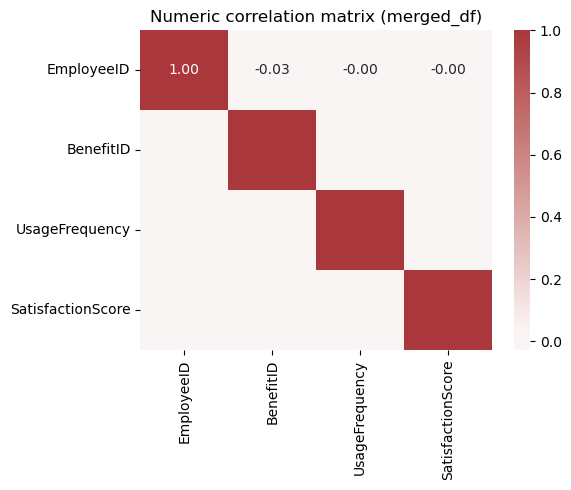

C:\Users\Mayukh Sen\AppData\Local\Temp\ipykernel_23204\453749090.py:25: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  benefit_corr = merged_df.groupby("BenefitID").apply(benefit_corr_stats)


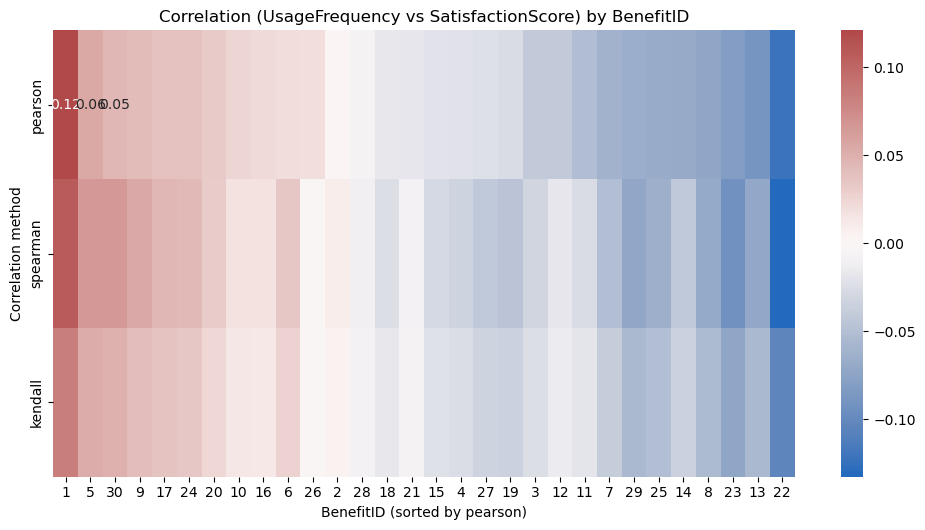

C:\Users\Mayukh Sen\AppData\Local\Temp\ipykernel_23204\453749090.py:40: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_corr = merged_with_age.groupby("AgeGroup").apply(lambda g: pd.Series({
C:\Users\Mayukh Sen\AppData\Local\Temp\ipykernel_23204\453749090.py:40: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  age_corr = merged_with_age.groupby("AgeGroup").apply(lambda g: pd.Series({


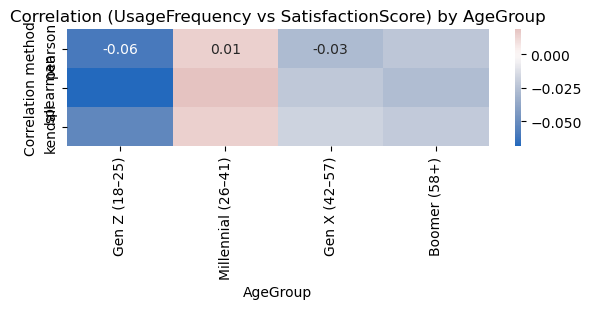

In [16]:
# Heatmaps for correlations in merged_df

# 1) Numeric correlation matrix (basic)
num_cols = merged_df.select_dtypes(include=[np.number]).columns.tolist()
corr_matrix = merged_df[num_cols].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="vlag", center=0)
plt.title("Numeric correlation matrix (merged_df)")
plt.tight_layout()
plt.show()

# 2) Correlations (UsageFrequency vs SatisfactionScore) by BenefitID
def benefit_corr_stats(df):
    if len(df) < 10:
        return pd.Series({"pearson": np.nan, "spearman": np.nan, "kendall": np.nan})
    x = df["UsageFrequency"]
    y = df["SatisfactionScore"]
    return pd.Series({
        "pearson": x.corr(y, method="pearson"),
        "spearman": x.corr(y, method="spearman"),
        "kendall": x.corr(y, method="kendall"),
    })

benefit_corr = merged_df.groupby("BenefitID").apply(benefit_corr_stats)
benefit_corr = benefit_corr.sort_values("pearson", ascending=False)  # sort for visualization

plt.figure(figsize=(10, max(4, 0.18 * len(benefit_corr))))
sns.heatmap(benefit_corr.T, annot=True, fmt=".2f", cmap="vlag", center=0)
plt.title("Correlation (UsageFrequency vs SatisfactionScore) by BenefitID")
plt.ylabel("Correlation method")
plt.xlabel("BenefitID (sorted by pearson)")
plt.tight_layout()
plt.show()

# 3) Correlations by AgeGroup (requires meta DataFrame with EmployeeID -> AgeGroup)
if "meta" in globals() and "AgeGroup" in meta.columns:
    m = meta[["EmployeeID", "AgeGroup"]].drop_duplicates()
    merged_with_age = merged_df.merge(m, on="EmployeeID", how="left")
    age_corr = merged_with_age.groupby("AgeGroup").apply(lambda g: pd.Series({
        "pearson": g["UsageFrequency"].corr(g["SatisfactionScore"], method="pearson"),
        "spearman": g["UsageFrequency"].corr(g["SatisfactionScore"], method="spearman"),
        "kendall": g["UsageFrequency"].corr(g["SatisfactionScore"], method="kendall"),
    }))
    age_corr = age_corr.sort_index()

    plt.figure(figsize=(6, max(2, 0.8 * len(age_corr))))
    sns.heatmap(age_corr.T, annot=True, fmt=".2f", cmap="vlag", center=0)
    plt.title("Correlation (UsageFrequency vs SatisfactionScore) by AgeGroup")
    plt.ylabel("Correlation method")
    plt.xlabel("AgeGroup")
    plt.tight_layout()
    plt.show()
else:
    print("meta with AgeGroup not available — skipping AgeGroup heatmap.")

### 3.3 Perform predictive sentiment analysis on Comments (positive, neutral, negative)

In [36]:
from nltk.sentiment import SentimentIntensityAnalyzer


In [37]:
# !pip install nltk
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd

nltk.download('vader_lexicon', quiet=True)
sia = SentimentIntensityAnalyzer()

# Raw scores
scores = feedback_df['Comments'].fillna('').apply(sia.polarity_scores)
feedback_df[['neg','neu','pos','compound']] = pd.DataFrame(scores.tolist(), index=feedback_df.index)

# Widen neutral band
NEUTRAL_MARGIN = 0.20  # tweak this to see more/less neutrals
def vader_to_label(compound, m=NEUTRAL_MARGIN):
    if compound >= m:
        return 'positive'
    elif compound <= -m:
        return 'negative'
    else:
        return 'neutral'

feedback_df['Sentiment'] = feedback_df['compound'].apply(vader_to_label)

# Summary
print("Counts:\n", feedback_df['Sentiment'].value_counts(), "\n")
print("Satisfaction vs. Sentiment:\n",
      pd.crosstab(feedback_df['SatisfactionScore'], feedback_df['Sentiment']))
print("\nProportion within each SatisfactionScore:\n",
      pd.crosstab(feedback_df['SatisfactionScore'], feedback_df['Sentiment'],
                  normalize='index').round(3))


Counts:
 Sentiment
neutral     13157
positive    11642
negative     5201
Name: count, dtype: int64 

Satisfaction vs. Sentiment:
 Sentiment          negative  neutral  positive
SatisfactionScore                             
1                      2987     3096         0
2                      1644     4234         0
3                       570     3598      1791
4                         0      818      5169
5                         0     1411      4682

Proportion within each SatisfactionScore:
 Sentiment          negative  neutral  positive
SatisfactionScore                             
1                     0.491    0.509     0.000
2                     0.280    0.720     0.000
3                     0.096    0.604     0.301
4                     0.000    0.137     0.863
5                     0.000    0.232     0.768


In [39]:
feedback_df.to_csv("sentiment_data.csv", index=False)

In [11]:
benefits_data =pd.read_csv("data/benefits_data.csv")

In [13]:
merged = feedback_df.merge(
    benefits_data,
    on="BenefitID",        # change to your actual common column
    how="left",            # keep all rows from feedback_df
    suffixes=('', '_benefits')  # avoid column name clashes
)

print(merged.head())
print("Shape:", merged.shape)


   EmployeeID  BenefitID  SatisfactionScore  \
0         970         19                  5   
1        3655         20                  1   
2        2540          3                  4   
3        4863         25                  5   
4        3304          3                  3   

                             Comments    neg    neu    pos  compound  \
0  Fantastic benefit! I use it daily.  0.000  0.303  0.697    0.7840   
1               Not worth the hassle.  0.357  0.643  0.000   -0.1695   
2       Sufficient time off provided.  0.000  1.000  0.000    0.0000   
3  Great peace of mind for my family.  0.000  0.397  0.603    0.8225   
4    Average amount of vacation days.  0.000  1.000  0.000    0.0000   

  Sentiment            BenefitType         BenefitSubType  BenefitCost  
0  positive         Gym Membership        Tier 2 Partners       343.73  
1   neutral  Tuition Reimbursement   Undergraduate Degree       489.96  
2   neutral      Commuter Benefits        Transit Subsidy       3

EmployeeID  BenefitID  SatisfactionScore  \
0             970         19                  5   
1            3655         20                  1   
2            2540          3                  4   
3            4863         25                  5   
4            3304          3                  3   
...           ...        ...                ...   
29995        3170          1                  2   
29996        4603          3                  2   
29997        3039          6                  4   
29998        4139          6                  3   
29999        2085         14                  3   

                                 Comments    neg    neu    pos  compound  \
0      Fantastic benefit! I use it daily.  0.000  0.303  0.697    0.7840   
1                   Not worth the hassle.  0.357  0.643  0.000   -0.1695   
2           Sufficient time off provided.  0.000  1.000  0.000    0.0000   
3      Great peace of mind for my family.  0.000  0.397  0.603    0.8225   
4        Average amount of vacation days.  0.000  1.000  0.000    0.0000   
...                                   ...    ...    ...    ...       ...   
29995        Returns are not as expected.  0.000  1.000  0.000    0.0000   
29996       Could use more vacation time.  0.000  1.000  0.000    0.0000   
29997      Good plan with decent returns.  0.000  0.580  0.420    0.4404   
29998      Standard, nothing exceptional.  0.000  1.000  0.000    0.0000   
29999   It's okay, I use it occasionally.  0.000  0.678  0.322    0.2263   

      Sentiment            BenefitType          BenefitSubType  BenefitCost  
0      positive         Gym Membership         Tier 2 Partners       343.73  
1       neutral  Tuition Reimbursement    Undergraduate Degree       489.96  
2       neutral      Commuter Benefits         Transit Subsidy       325.00  
3      positive         Life Insurance   Supplemental Standard       774.91  
4       neutral      Commuter Benefits         Transit Subsidy       325.00  
...         ...                    ...                     ...          ...  
29995   neutral        Retirement Plan     401k Basic Matching       876.21  
29996   neutral      Commuter Benefits         Transit Subsidy       325.00  
29997  positive        Retirement Plan  401k Standard Matching       598.44  
29998   neutral        Retirement Plan  401k Standard Matching       598.44  
29999  positive         Gym Membership         Tier 1 Partners        73.36  

[30000 rows x 12 columns]

In [15]:
usage_df

EmployeeID  BenefitID  UsageFrequency LastUsedDate
0            4245         25               2   2023-09-01
1             220         20               4   2024-05-03
2            4716         24               4   2024-02-10
3            3971         26               0   2023-09-15
4            1048         24               1   2024-05-29
...           ...        ...             ...          ...
49995        4288         20               4   2024-04-30
49996        4627         30               0   2024-06-08
49997        1993         10               2   2023-09-25
49998        3782         26               0   2024-01-06
49999         353          1               5   2024-02-23

[50000 rows x 4 columns]

In [21]:
merged2 = merged.merge(
    usage_df,
    on=["EmployeeID", "BenefitID"],        # change to your actual common column
    how="inner",            # keep all rows from feedback_df
    suffixes=('', '_usage')  # avoid column name clashes
)

print(merged2.head())
print("Shape:", merged2.shape)

   EmployeeID  BenefitID  SatisfactionScore                        Comments  \
0        2540          3                  4   Sufficient time off provided.   
1        3495         25                  2            Coverage is minimal.   
2         403         18                  4  Good plan with decent returns.   
3         403         18                  4  Good plan with decent returns.   
4        1982         28                  1          Disappointing service.   

     neg    neu   pos  compound Sentiment        BenefitType  \
0  0.000  1.000  0.00    0.0000   neutral  Commuter Benefits   
1  0.000  1.000  0.00    0.0000   neutral     Life Insurance   
2  0.000  0.580  0.42    0.4404  positive    Retirement Plan   
3  0.000  0.580  0.42    0.4404  positive    Retirement Plan   
4  0.762  0.238  0.00   -0.4939  negative     Life Insurance   

          BenefitSubType  BenefitCost  UsageFrequency LastUsedDate  
0        Transit Subsidy       325.00               3   2023-10-20  
1 

In [22]:
merged2

EmployeeID  BenefitID  SatisfactionScore  \
0           2540          3                  4   
1           3495         25                  2   
2            403         18                  4   
3            403         18                  4   
4           1982         28                  1   
...          ...        ...                ...   
9827        1122         25                  2   
9828        4809         22                  5   
9829        4603          3                  2   
9830        4603          3                  2   
9831        4139          6                  3   

                                Comments    neg    neu    pos  compound  \
0          Sufficient time off provided.  0.000  1.000  0.000    0.0000   
1                   Coverage is minimal.  0.000  1.000  0.000    0.0000   
2         Good plan with decent returns.  0.000  0.580  0.420    0.4404   
3         Good plan with decent returns.  0.000  0.580  0.420    0.4404   
4                 Disappointing service.  0.762  0.238  0.000   -0.4939   
...                                  ...    ...    ...    ...       ...   
9827                Coverage is minimal.  0.000  1.000  0.000    0.0000   
9828  Excellent coverage and affordable.  0.000  0.448  0.552    0.5719   
9829       Could use more vacation time.  0.000  1.000  0.000    0.0000   
9830       Could use more vacation time.  0.000  1.000  0.000    0.0000   
9831      Standard, nothing exceptional.  0.000  1.000  0.000    0.0000   

     Sentiment        BenefitType          BenefitSubType  BenefitCost  \
0      neutral  Commuter Benefits         Transit Subsidy       325.00   
1      neutral     Life Insurance   Supplemental Standard       774.91   
2     positive    Retirement Plan    401k Investment Fees       743.01   
3     positive    Retirement Plan    401k Investment Fees       743.01   
4     negative     Life Insurance      Dependent Coverage       165.54   
...        ...                ...                     ...          ...   
9827   neutral     Life Insurance   Supplemental Standard       774.91   
9828  positive   Health Insurance              HMO Family       624.00   
9829   neutral  Commuter Benefits         Transit Subsidy       325.00   
9830   neutral  Commuter Benefits         Transit Subsidy       325.00   
9831   neutral    Retirement Plan  401k Standard Matching       598.44   

      UsageFrequency LastUsedDate  
0                  3   2023-10-20  
1                  6   2023-10-06  
2                  0   2023-11-20  
3                  5   2023-12-14  
4                  5   2024-07-02  
...              ...          ...  
9827               3   2023-10-02  
9828               4   2023-11-06  
9829               7   2023-10-06  
9830               3   2023-10-01  
9831               5   2024-06-28  

[9832 rows x 14 columns]

In [24]:
import statsmodels.formula.api as smf

In [27]:
df=merged2.copy()

In [29]:
# Encode sentiment
df['SentimentNum'] = df['Sentiment'].map({'negative': -1, 'neutral': 0, 'positive': 1})

# Ensure numeric
for col in ['UsageFrequency','BenefitCost','SatisfactionScore','pos','neu','neg','compound']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop missing target
df = df.dropna(subset=['SatisfactionScore'])

# Build regression formula
formula = "SatisfactionScore ~ UsageFrequency + BenefitCost + SentimentNum + pos + neu + neg + compound"

# Fit regression
model = smf.ols(formula, data=df).fit()

# Show results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      SatisfactionScore   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     2084.
Date:                Wed, 20 Aug 2025   Prob (F-statistic):               0.00
Time:                        13:37:53   Log-Likelihood:                -12900.
No. Observations:                9832   AIC:                         2.582e+04
Df Residuals:                    9824   BIC:                         2.587e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1008.3629     56.198    -17.

In [30]:
employee_df = pd.read_csv("data/employee_data.csv")  # Load your employee data

In [31]:
# Merge feedback/benefit/usage data with employee data
merged_full = merged2.merge(
    employee_df,
    on="EmployeeID",     # assuming EmployeeID is the common key
    how="left"
)


In [32]:
merged_full

EmployeeID  BenefitID  SatisfactionScore  \
0           2540          3                  4   
1           3495         25                  2   
2            403         18                  4   
3            403         18                  4   
4           1982         28                  1   
...          ...        ...                ...   
9827        1122         25                  2   
9828        4809         22                  5   
9829        4603          3                  2   
9830        4603          3                  2   
9831        4139          6                  3   

                                Comments    neg    neu    pos  compound  \
0          Sufficient time off provided.  0.000  1.000  0.000    0.0000   
1                   Coverage is minimal.  0.000  1.000  0.000    0.0000   
2         Good plan with decent returns.  0.000  0.580  0.420    0.4404   
3         Good plan with decent returns.  0.000  0.580  0.420    0.4404   
4                 Disappointing service.  0.762  0.238  0.000   -0.4939   
...                                  ...    ...    ...    ...       ...   
9827                Coverage is minimal.  0.000  1.000  0.000    0.0000   
9828  Excellent coverage and affordable.  0.000  0.448  0.552    0.5719   
9829       Could use more vacation time.  0.000  1.000  0.000    0.0000   
9830       Could use more vacation time.  0.000  1.000  0.000    0.0000   
9831      Standard, nothing exceptional.  0.000  1.000  0.000    0.0000   

     Sentiment        BenefitType          BenefitSubType  BenefitCost  \
0      neutral  Commuter Benefits         Transit Subsidy       325.00   
1      neutral     Life Insurance   Supplemental Standard       774.91   
2     positive    Retirement Plan    401k Investment Fees       743.01   
3     positive    Retirement Plan    401k Investment Fees       743.01   
4     negative     Life Insurance      Dependent Coverage       165.54   
...        ...                ...                     ...          ...   
9827   neutral     Life Insurance   Supplemental Standard       774.91   
9828  positive   Health Insurance              HMO Family       624.00   
9829   neutral  Commuter Benefits         Transit Subsidy       325.00   
9830   neutral  Commuter Benefits         Transit Subsidy       325.00   
9831   neutral    Retirement Plan  401k Standard Matching       598.44   

      UsageFrequency LastUsedDate  Age      Gender Department  Tenure  
0                  3   2023-10-20   22  Non-Binary         HR       2  
1                  6   2023-10-06   43        Male         IT       6  
2                  0   2023-11-20   60        Male  Marketing      34  
3                  5   2023-12-14   60        Male  Marketing      34  
4                  5   2024-07-02   32        Male  Marketing       7  
...              ...          ...  ...         ...        ...     ...  
9827               3   2023-10-02   55        Male    Finance      24  
9828               4   2023-11-06   44      Female  Marketing      18  
9829               7   2023-10-06   26      Female         IT       7  
9830               3   2023-10-01   26      Female         IT       7  
9831               5   2024-06-28   28      Female         IT       2  

[9832 rows x 18 columns]

In [38]:

# Copy to avoid overwriting original
df = merged.copy()   # your merged dataset with BenefitType & BenefitSubType

# --- Aggregate by BenefitType / BenefitSubType ---
scorecard = (
    df.groupby(['BenefitType','BenefitSubType'])
      .agg(
          Count=('SatisfactionScore','size'),
          Avg_Satisfaction=('SatisfactionScore','mean'),
          Pos_SentimentPct=('Sentiment', lambda x: (x=='positive').mean()*100),
          Neu_SentimentPct=('Sentiment', lambda x: (x=='neutral').mean()*100),
          Neg_SentimentPct=('Sentiment', lambda x: (x=='negative').mean()*100)
      )
      .reset_index()
      .sort_values(by='Avg_Satisfaction', ascending=False)
)

# Show top of the scorecard
print(scorecard.head(10))

                  BenefitType              BenefitSubType  Count  \
4   Flexible Spending Account              Healthcare FSA   1007   
24         Technology Stipend  Monthly Internet Allowance   1027   
6              Gym Membership             Tier 1 Partners    967   
5              Gym Membership           Family Membership   1036   
1                   Childcare           After-School Care    992   
29          Wellness Programs     Premium Discount Tier 1   1019   
14             Life Insurance          Dependent Coverage    994   
27      Tuition Reimbursement  Professional Certification    960   
3           Commuter Benefits             Transit Subsidy    989   
9            Health Insurance             HDHP Individual    993   

    Avg_Satisfaction  Pos_SentimentPct  Neu_SentimentPct  Neg_SentimentPct  
4           3.136048         22.641509         77.358491          0.000000  
24          3.081792         42.648491          0.000000         57.351509  
6           3.058945

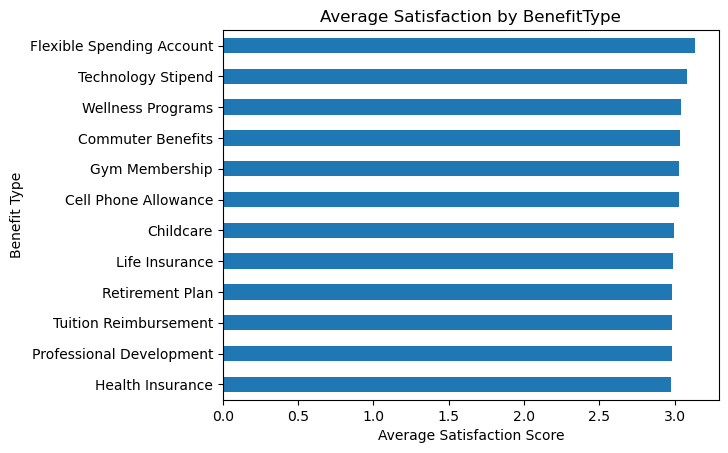

In [39]:
import matplotlib.pyplot as plt

# Bar chart of average satisfaction per BenefitType
df.groupby('BenefitType')['SatisfactionScore'].mean().sort_values().plot(kind='barh')
plt.xlabel("Average Satisfaction Score")
plt.ylabel("Benefit Type")
plt.title("Average Satisfaction by BenefitType")
plt.show()


In [40]:
scorecard

BenefitType               BenefitSubType  Count  \
4   Flexible Spending Account               Healthcare FSA   1007   
24         Technology Stipend   Monthly Internet Allowance   1027   
6              Gym Membership              Tier 1 Partners    967   
5              Gym Membership            Family Membership   1036   
1                   Childcare            After-School Care    992   
29          Wellness Programs      Premium Discount Tier 1   1019   
14             Life Insurance           Dependent Coverage    994   
27      Tuition Reimbursement   Professional Certification    960   
3           Commuter Benefits              Transit Subsidy    989   
9            Health Insurance              HDHP Individual    993   
0        Cell Phone Allowance       Monthly Communications    939   
21            Retirement Plan         401k Investment Fees   1020   
8              Gym Membership              Tier 3 Partners    977   
16             Life Insurance        Supplemental Standard    988   
7              Gym Membership              Tier 2 Partners    951   
19            Retirement Plan  401k Catch-Up Contributions    994   
20            Retirement Plan       401k High Contribution    930   
23            Retirement Plan       401k Standard Matching   1056   
25      Tuition Reimbursement              Graduate Degree   1008   
17   Professional Development        Conference Attendance   1056   
12           Health Insurance               PPO Individual    987   
26      Tuition Reimbursement           Individual Courses   1061   
22            Retirement Plan        401k Maximum Matching   1004   
13             Life Insurance               Basic Coverage    965   
11           Health Insurance                   PPO Family   1006   
2                   Childcare          On-Site Infant Care   1058   
28      Tuition Reimbursement         Undergraduate Degree   1023   
10           Health Insurance                   HMO Family    993   
18            Retirement Plan          401k Basic Matching    988   
15             Life Insurance     Supplemental High Amount   1012   

    Avg_Satisfaction  Pos_SentimentPct  Neu_SentimentPct  Neg_SentimentPct  
4           3.136048         22.641509         77.358491          0.000000  
24          3.081792         42.648491          0.000000         57.351509  
6           3.058945         61.530507         19.544984         18.924509  
5           3.046332         61.389961         18.339768         20.270270  
1           3.045363         22.278226         77.721774          0.000000  
29          3.045142         22.080471         77.919529          0.000000  
14          3.041247         40.845070         39.839034         19.315895  
27          3.035417         40.625000         59.375000          0.000000  
3           3.033367         20.323559         79.676441          0.000000  
9           3.029204         59.415911          0.000000         40.584089  
0           3.026624         40.681576          0.000000         59.318424  
21          3.026471         18.431373         81.568627          0.000000  
8           3.016377         61.105425         19.549642         19.344933  
16          3.016194         40.080972         39.676113         20.242915  
7           3.003155         61.303891         18.086225         20.609884  
19          3.000000         19.919517         80.080483          0.000000  
20          2.993548         21.290323         78.709677          0.000000  
23          2.982008         20.738636         79.261364          0.000000  
25          2.981151         39.682540         60.317460          0.000000  
17          2.981061         40.814394          0.000000         59.185606  
12          2.974671         60.992908          0.000000         39.007092  
26          2.966070         39.019793         60.980207          0.000000  
22          2.965139         19.123506         80.876494          0.000000  
13          2.962694         3

In [37]:
scorecard.to_csv("data/benefit_scorecard.csv", index=False)  # Save scorecard to CSV

In [42]:
# Sort and get top 3 by each sentiment metric
top_neg = scorecard.sort_values(by='Neg_SentimentPct', ascending=False).head(5)
top_neu = scorecard.sort_values(by='Neu_SentimentPct', ascending=False).head(5)
top_pos = scorecard.sort_values(by='Pos_SentimentPct', ascending=False).head(5)

print("🔴 Top 5 by Negative Sentiment %")
print(top_neg[['BenefitType','BenefitSubType','Neg_SentimentPct']])

print("\n🟡 Top 5 by Neutral Sentiment %")
print(top_neu[['BenefitType','BenefitSubType','Neu_SentimentPct']])

print("\n🟢 Top 5 by Positive Sentiment %")
print(top_pos[['BenefitType','BenefitSubType','Pos_SentimentPct']])


🔴 Top 5 by Negative Sentiment %
                 BenefitType              BenefitSubType  Neg_SentimentPct
0       Cell Phone Allowance      Monthly Communications         59.318424
17  Professional Development       Conference Attendance         59.185606
24        Technology Stipend  Monthly Internet Allowance         57.351509
10          Health Insurance                  HMO Family         41.893253
11          Health Insurance                  PPO Family         40.954274

🟡 Top 5 by Neutral Sentiment %
          BenefitType               BenefitSubType  Neu_SentimentPct
21    Retirement Plan         401k Investment Fees         81.568627
18    Retirement Plan          401k Basic Matching         81.174089
22    Retirement Plan        401k Maximum Matching         80.876494
19    Retirement Plan  401k Catch-Up Contributions         80.080483
3   Commuter Benefits              Transit Subsidy         79.676441

🟢 Top 5 by Positive Sentiment %
         BenefitType     BenefitSubType

## Analysis of Benefits and Sub-Benefits

In [3]:
scorecard = pd.read_csv("data/benefit_scorecard.csv")  # Load saved scorecard

In [7]:
feedback_df = pd.read_csv("data/feedback_data.csv")  # Load your feedback data

In [16]:
feedback_df

EmployeeID  BenefitID  SatisfactionScore  \
0             970         19                  5   
1            3655         20                  1   
2            2540          3                  4   
3            4863         25                  5   
4            3304          3                  3   
...           ...        ...                ...   
29995        3170          1                  2   
29996        4603          3                  2   
29997        3039          6                  4   
29998        4139          6                  3   
29999        2085         14                  3   

                                 Comments  
0      Fantastic benefit! I use it daily.  
1                   Not worth the hassle.  
2           Sufficient time off provided.  
3      Great peace of mind for my family.  
4        Average amount of vacation days.  
...                                   ...  
29995        Returns are not as expected.  
29996       Could use more vacation time.  
29997      Good plan with decent returns.  
29998      Standard, nothing exceptional.  
29999   It's okay, I use it occasionally.  

[30000 rows x 4 columns]

In [4]:
scorecard.head()

BenefitType     BenefitSubType  Count  Avg_Satisfaction  \
0  Flexible Spending Account     Healthcare FSA    346          3.242775   
1           Health Insurance     PPO Individual    307          3.153094   
2           Health Insurance    HDHP Individual    324          3.132716   
3                  Childcare  After-School Care    306          3.124183   
4             Gym Membership    Tier 1 Partners    300          3.123333   

   Pos_SentimentPct  Neu_SentimentPct  Neg_SentimentPct  
0         24.566474         75.433526          0.000000  
1         65.146580          0.000000         34.853420  
2         63.271605          0.000000         36.728395  
3         23.856209         76.143791          0.000000  
4         63.000000         20.333333         16.666667

In [9]:
# Filter scorecard for Commuter Benefits -> Transit Subsidy
row = scorecard[
    (scorecard['BenefitType'] == 'Commuter Benefits') & 
    (scorecard['BenefitSubType'] == 'Transit Subsidy')
]

if not row.empty:
    pos = row['Pos_SentimentPct'].values[0]
    neu = row['Neu_SentimentPct'].values[0]
    neg = row['Neg_SentimentPct'].values[0]
    print(f"Positive: {pos:.2f}%")
    print(f"Neutral : {neu:.2f}%")
    print(f"Negative: {neg:.2f}%")
else:
    print("No matching BenefitType/SubType found.")


Positive: 18.24%
Neutral : 81.76%
Negative: 0.00%


In [10]:
# Filter scorecard for Commuter Benefits -> Transit Subsidy
row = scorecard[
    (scorecard['BenefitType'] == 'Cell Phone Allowance') & 
    (scorecard['BenefitSubType'] == 'Monthly Communications')
]

if not row.empty:
    pos = row['Pos_SentimentPct'].values[0]
    neu = row['Neu_SentimentPct'].values[0]
    neg = row['Neg_SentimentPct'].values[0]
    print(f"Positive: {pos:.2f}%")
    print(f"Neutral : {neu:.2f}%")
    print(f"Negative: {neg:.2f}%")
else:
    print("No matching BenefitType/SubType found.")

Positive: 44.71%
Neutral : 0.00%
Negative: 55.29%


In [11]:
# Filter scorecard for Commuter Benefits -> Transit Subsidy
row = scorecard[
    (scorecard['BenefitType'] == 'Professional Development') & 
    (scorecard['BenefitSubType'] == 'Conference Attendance')
]

if not row.empty:
    pos = row['Pos_SentimentPct'].values[0]
    neu = row['Neu_SentimentPct'].values[0]
    neg = row['Neg_SentimentPct'].values[0]
    print(f"Positive: {pos:.2f}%")
    print(f"Neutral : {neu:.2f}%")
    print(f"Negative: {neg:.2f}%")
else:
    print("No matching BenefitType/SubType found.")

Positive: 42.18%
Neutral : 0.00%
Negative: 57.82%


In [12]:
# Rank benefits by lowest positive sentiment percentage
least_positive = scorecard.sort_values(by='Pos_SentimentPct', ascending=True)

# Show top 5 with the least positive sentiment
print(least_positive[['BenefitType','BenefitSubType','Pos_SentimentPct']].head(5))


          BenefitType               BenefitSubType  Pos_SentimentPct
28    Retirement Plan          401k Basic Matching         15.666667
29    Retirement Plan  401k Catch-Up Contributions         17.682927
8   Commuter Benefits              Transit Subsidy         18.235294
7     Retirement Plan         401k Investment Fees         19.620253
21    Retirement Plan        401k Maximum Matching         19.801980


In [17]:
cost_analysis = pd.read_csv("data/cost_analysis.csv")  # Load your cost analysis data

In [18]:
cost_analysis.head()

BenefitID  BenefitCost  UsageFrequency   UsageCost
0          1   1470280.38            5721  256.997095
1          2   1143105.81            5267  217.031671
2          3    551525.00            5503  100.222606
3          4    459088.64            6105   75.198794
4          5    127200.00            5644   22.537208

In [20]:
# Show BenefitCost for BenefitID -17 using existing cost_analysis DataFrame
bid = 17
match = cost_analysis.loc[cost_analysis['BenefitID'] == bid, 'BenefitCost']
if not match.empty:
    print(f"BenefitID {bid} - BenefitCost: {match.iloc[0]}")
else:
    print(f"BenefitID {bid} not found in cost_analysis")

BenefitID 17 - BenefitCost: 820536.4999999999


In [22]:
total_benefit_cost = cost_analysis['BenefitCost'].sum()
print(f"Total BenefitCost sum: {total_benefit_cost:.2f}")

Total BenefitCost sum: 26058568.12


In [25]:
benefits_data = pd.read_csv("data/benefits_data.csv")
